# TR and GP test in Indian TC initial

### initialization

In [1]:
from datetime import datetime
from matplotlib.pyplot import title
import safedigital.gas_pressure as GP
import safedigital.temperature as TR
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import combinations
sns.set(color_codes=True)
os.chdir('../')
curDirectory = os.getcwd()
print(curDirectory)


c:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics


## GP parameters fitting 

### Data loading

In [2]:
test_date_list = ['2022_03_15','2022_03_16','2022_03_17','2022_03_21','2022_03_25'] # all test dates
case_list,data_len_list = [],[]
# splice data in all test days
for j,test_date in enumerate(test_date_list):

		file_path = curDirectory + \
					'\\07_Test from other lab\India Lab\\SafeRing_XT_' + test_date + '.csv'
		# config_path = curDirectory + \
		# 			'\\07_Test from other lab\India Lab\Json' + '\\' + test_date + '_config.json'
		# fig_path = curDirectory + '\\07_Test from other lab\India Lab\Figures'
		case = GP.GasPresExperiment_IN(file_path)
		case_list.append(case)
		if j == 0:
				data_full_df = pd.DataFrame(columns=case.data.columns)
		data_len_list.append(case.length)
		data_full_df = data_full_df.append(case.data)
date_time = list(data_full_df['date_time'])
x_tick_idx = []
for k in range(len(test_date_list)):
	x_tick_idx += list(range(sum(data_len_list[:k]),sum(data_len_list[:k+1]),240))
x_tick_str = [datetime.strftime(date_time[i],
			  "%m/%d %H:%M") for i in x_tick_idx]
t1 = data_full_df['Unit1_Mano_T'].values # temp from manometer
t = (data_full_df['Point 26'].values +
	  data_full_df['Point 27'].values +
	  data_full_df['Point 28'].values) / 3  # average ambient temp
t_tank_true = data_full_df['Point 25'].values # temp from middle of gas tank
p_mano = data_full_df['Unit1_Mano_P'].values

### cross-verification 4 days training 1 day validation

poly_coef =  [-0.   -0.12 -1.01]
sigma and max_abs are 2.0 3.4
poly_coef =  [-0.02 -0.37 -1.36]
sigma and max_abs are 5.6 7.5
poly_coef =  [-0.01 -0.23 -1.26]
sigma and max_abs are 1.4 2.7
poly_coef =  [-0.02 -0.67 -4.08]
sigma and max_abs are 2.8 5.9
poly_coef =  [ 0.03  0.3  -0.52]
sigma and max_abs are 7.8 10.1


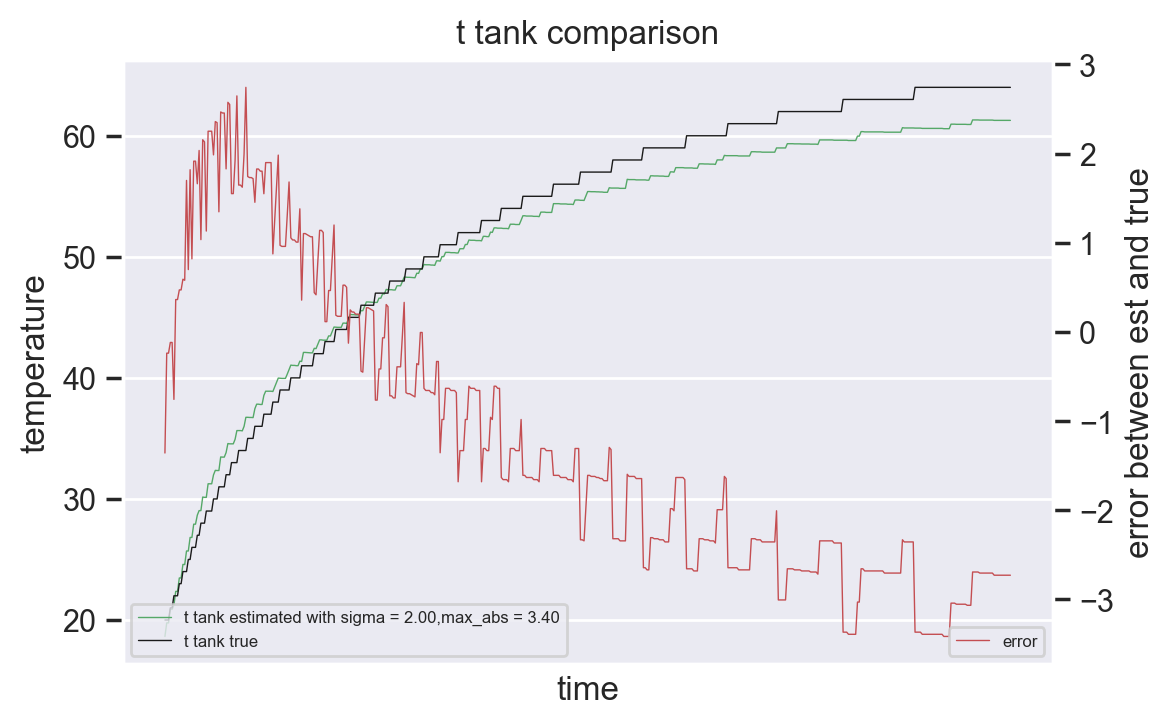

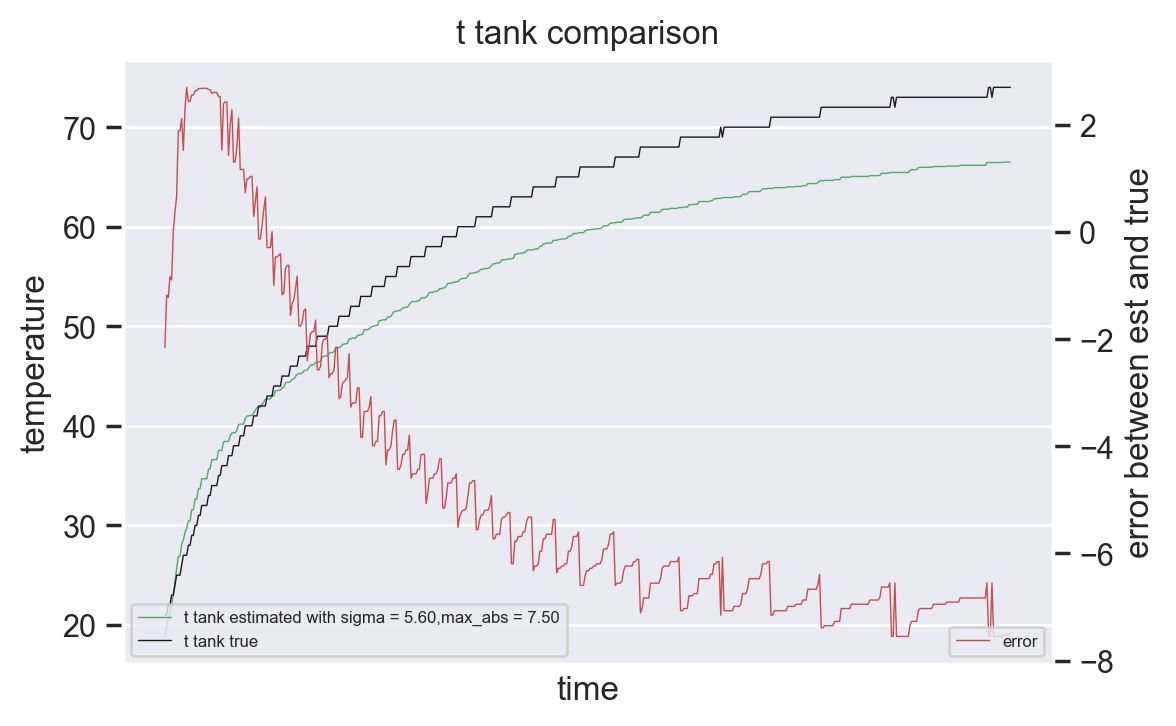

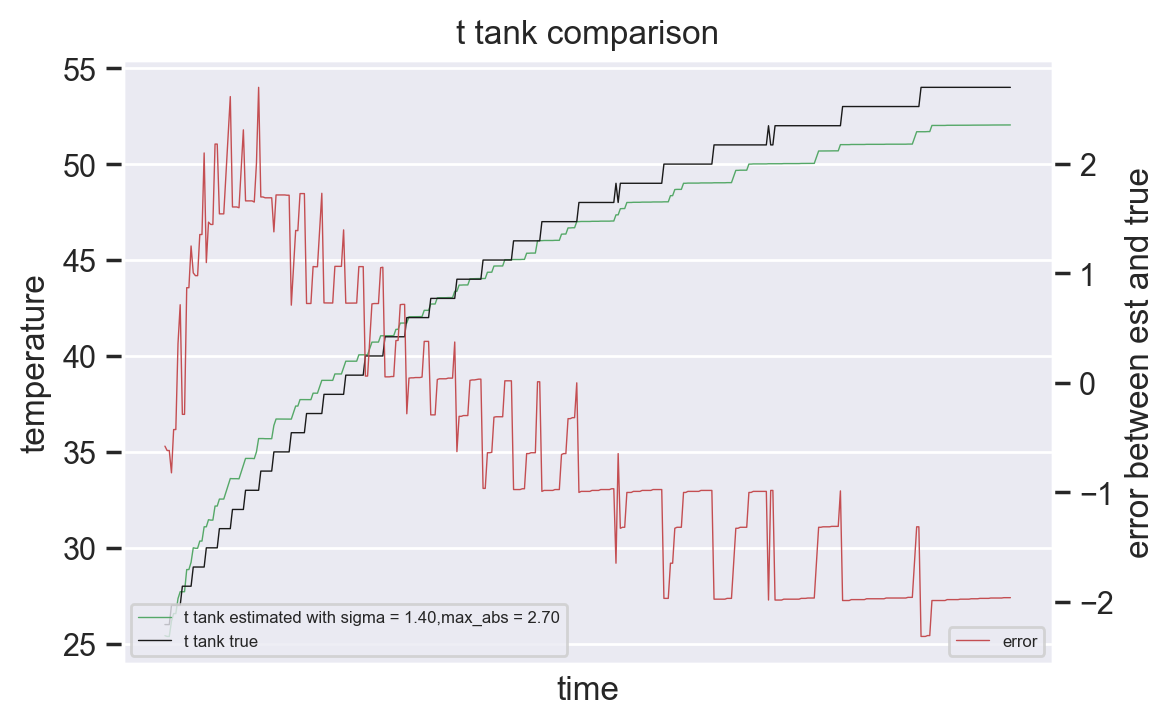

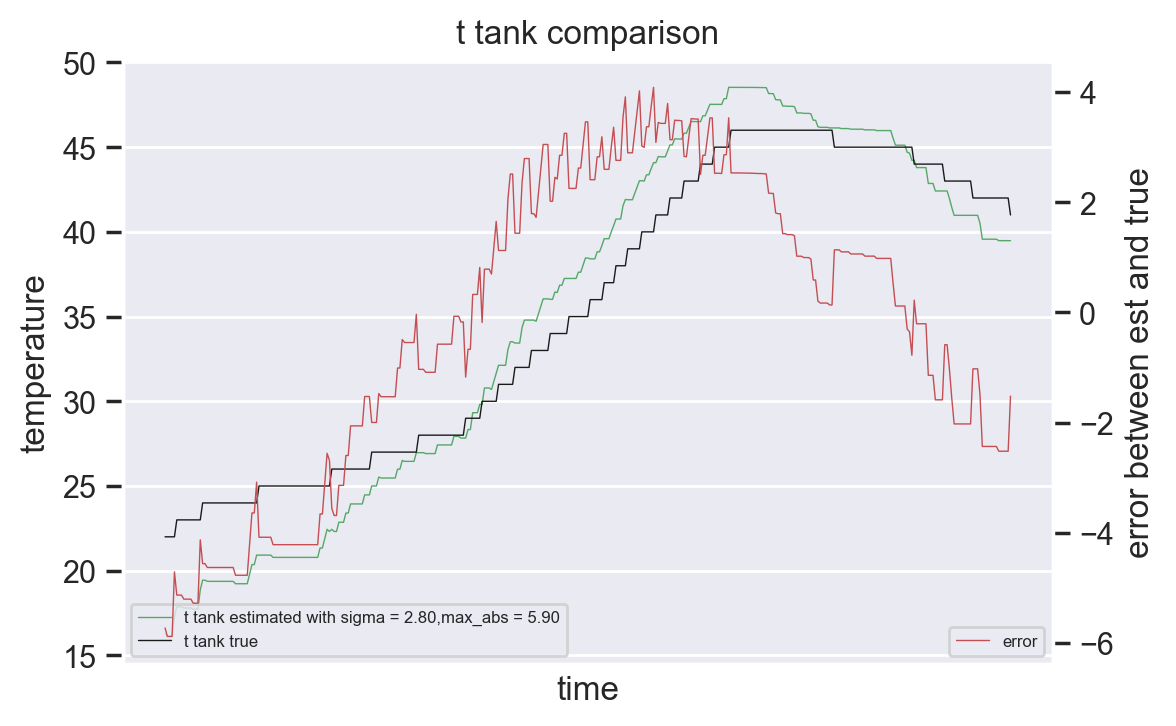

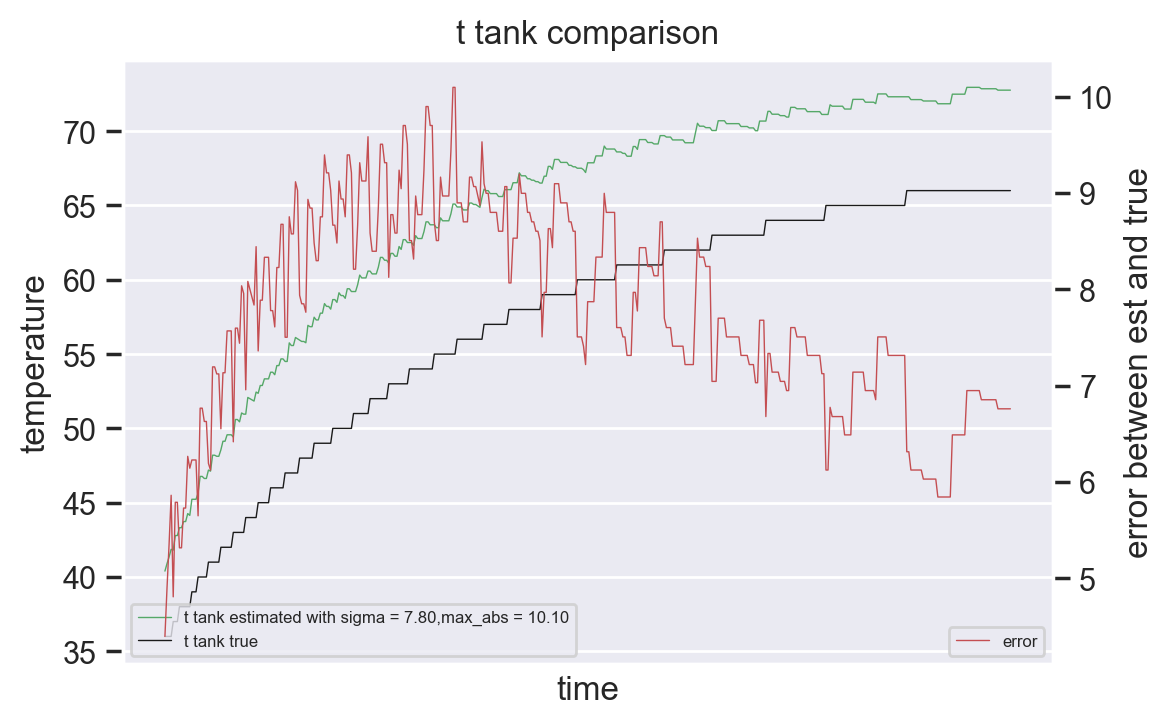

In [3]:
for valid_num,valid_date in enumerate(test_date_list):
	# find head and tail of validation data
	head,tail = sum(data_len_list[0:valid_num]),sum(data_len_list[0:valid_num + 1])

	# validation array
	x1_valid = np.array([i for num,i in enumerate(t1 - t) 
						if num in range(head,tail)])
	x2_valid = x1_valid ** 2
	t_valid = np.array([i for num,i in enumerate(t) if num in range(head,tail)])
	t_tank_true_valid = np.array([i for num,i in enumerate(t_tank_true) if num in range(head,tail)])	
	y_valid = np.array([i for num,i in enumerate(t_tank_true - t) 
						if num in range(head,tail)])
	X_valid =  np.column_stack((x2_valid,x1_valid))
	
	# train array 					
	x1_train = np.array([i for num,i in enumerate(t1 - t) 
						if num not in range(head,tail)])
	x2_train = x1_train ** 2 					
	y1_train = np.array([i for num,i in enumerate(t_tank_true - t) 
						if num not in range(head,tail)])
	X_train = np.column_stack((x2_train,x1_train)) 

	# Calculate Least square regression parameters
	# lsr_coef = np.around(GP.GasPresExperiment_IN.cal_lsr_reg_coef(y1_train,X_train),decimals=2)
	# print('lsr_coef = ',lsr_coef)
	# Calculate polynomial fitting parameters
	poly_coef = np.around(GP.GasPresExperiment_IN.cal_polyfit_coef(2,y1_train,x1_train),decimals=2)
	print('poly_coef = ',poly_coef)
	t_tank_est = np.dot(X_valid,poly_coef[:-1]) + poly_coef[-1] + t_valid
	sigma,max_abs = GP.GasPresExperiment_IN.plot_t_tank_compare(t_tank_true_valid,t_tank_est)
	print('sigma and max_abs are',sigma,max_abs)





### 5 days training 5 days validation

poly_coef =  [-0.   -0.22 -1.38]
sigma and max_abs are 2.7 6.8


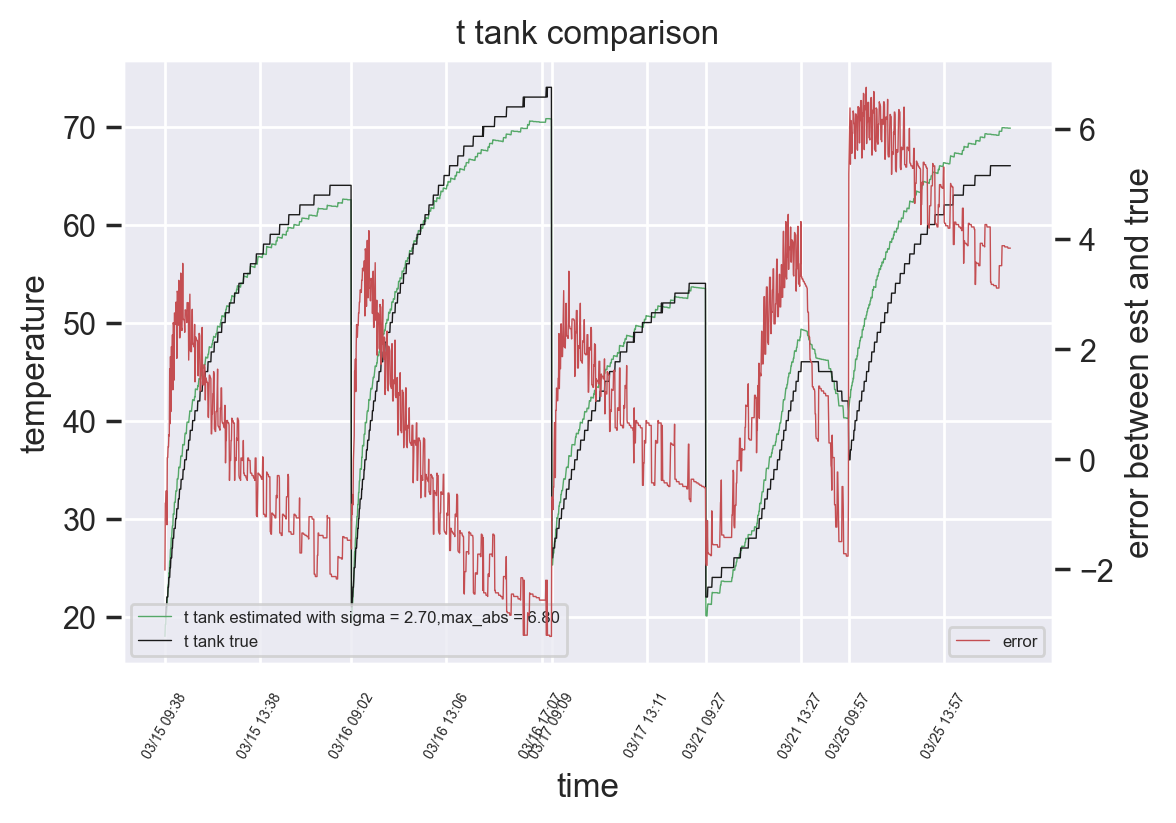

In [4]:
x1 = (t1 - t).astype(float)
x2 = x1 ** 2
y = (t_tank_true - t).astype(float)
x_stack =  np.column_stack((x2,x1))		
# Calculate polynomial fitting parameters
poly_coef = np.around(GP.GasPresExperiment_IN.cal_polyfit_coef(2,y,x1),decimals=2)
print('poly_coef = ',poly_coef)
t_tank_est = np.dot(x_stack,poly_coef[:-1]) + poly_coef[-1] + t
sigma,max_abs = GP.GasPresExperiment_IN.plot_t_tank_compare(t_tank_true,
															t_tank_est,
															x_tick_idx=x_tick_idx,
															x_tick_str=x_tick_str)
print('sigma and max_abs are',sigma,max_abs)

### Any number of characteristic days training, 5 days validation

(0,)
poly_coef =  [ 0.05  0.58 -1.06]
sigma and max_abs are 4.7 12.9
(1,)
poly_coef =  [ 0.05  0.61 -1.14]
sigma and max_abs are 4.4 12.2
(2,)
poly_coef =  [0.08 1.12 1.83]
sigma and max_abs are 7.2 18.2
(3,)
poly_coef =  [-0.    0.02 -0.34]
sigma and max_abs are 3.0 6.7
(4,)
poly_coef =  [ 0.03  0.62 -1.51]
sigma and max_abs are 4.8 8.5
(0, 1)
poly_coef =  [ 0.03  0.21 -1.73]
sigma and max_abs are 4.0 10.8
(0, 2)
poly_coef =  [ 0.03  0.32 -1.07]
sigma and max_abs are 3.3 9.1
(0, 3)
poly_coef =  [ 0.04  0.43 -0.28]
sigma and max_abs are 4.6 12.2
(0, 4)
poly_coef =  [-0.04 -0.99 -3.83]
sigma and max_abs are 2.8 7.0
(1, 2)
poly_coef =  [ 0.02  0.14 -1.46]
sigma and max_abs are 2.9 7.9
(1, 3)
poly_coef =  [ 0.04  0.49 -0.14]
sigma and max_abs are 4.0 11.1
(1, 4)
poly_coef =  [-0.03 -0.78 -4.39]
sigma and max_abs are 2.9 6.9
(2, 3)
poly_coef =  [ 0.01  0.09 -0.49]
sigma and max_abs are 2.5 5.4
(2, 4)
poly_coef =  [-0.03 -0.62 -3.45]
sigma and max_abs are 4.0 8.5
(3, 4)
poly_coef =  [ 0.   

c:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\01_Code\safedigital\gas_pressure.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=200)


poly_coef =  [-0.02 -0.65 -4.31]
sigma and max_abs are 2.6 6.4
(1, 3, 4)
poly_coef =  [ 0.   -0.03 -0.79]
sigma and max_abs are 2.8 6.2
(2, 3, 4)
poly_coef =  [-0.01 -0.18 -0.69]
sigma and max_abs are 3.0 6.9
(0, 1, 2, 3)
poly_coef =  [ 0.03  0.3  -0.52]
sigma and max_abs are 3.7 10.1
(0, 1, 2, 4)
poly_coef =  [-0.02 -0.67 -4.08]
sigma and max_abs are 2.5 6.2
(0, 1, 3, 4)
poly_coef =  [-0.01 -0.23 -1.26]
sigma and max_abs are 2.8 6.5
(0, 2, 3, 4)
poly_coef =  [-0.02 -0.37 -1.36]
sigma and max_abs are 3.4 7.5
(1, 2, 3, 4)
poly_coef =  [-0.   -0.12 -1.01]
sigma and max_abs are 2.4 5.3
(0, 1, 2, 3, 4)
poly_coef =  [-0.   -0.22 -1.38]
sigma and max_abs are 2.7 6.8


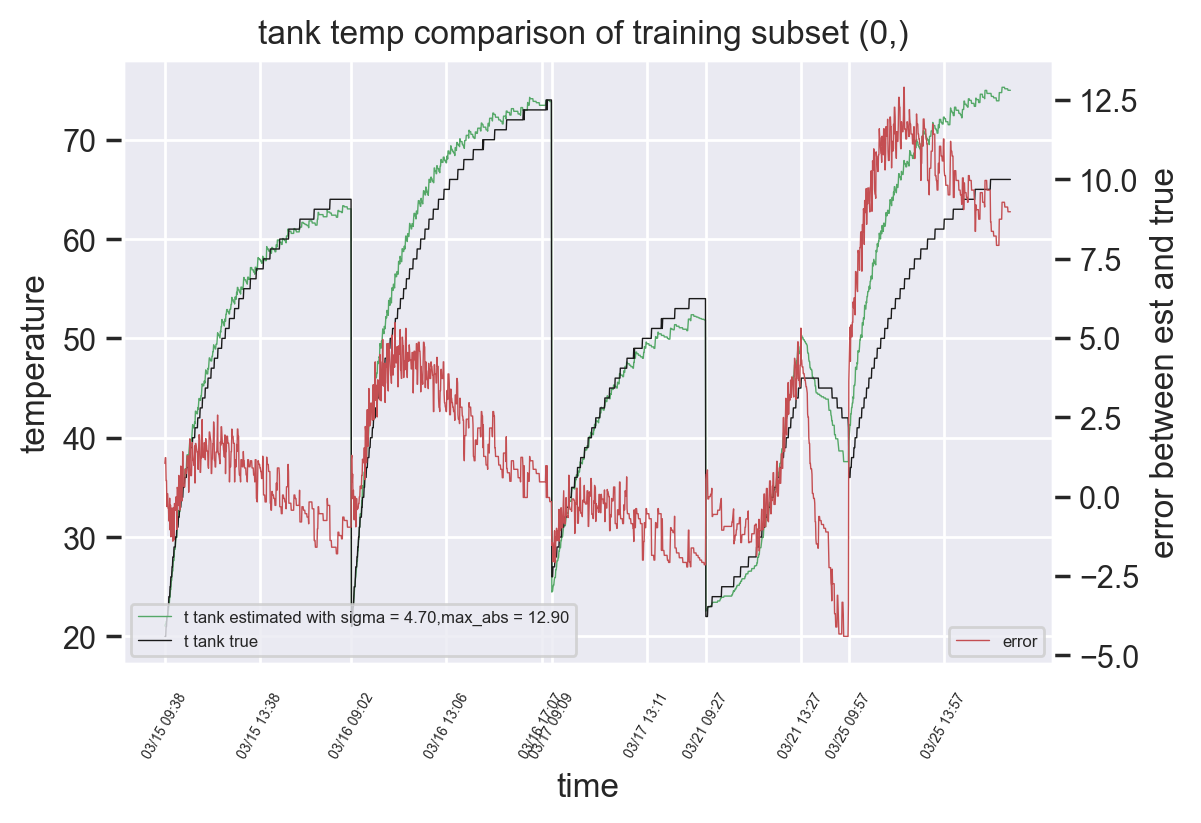

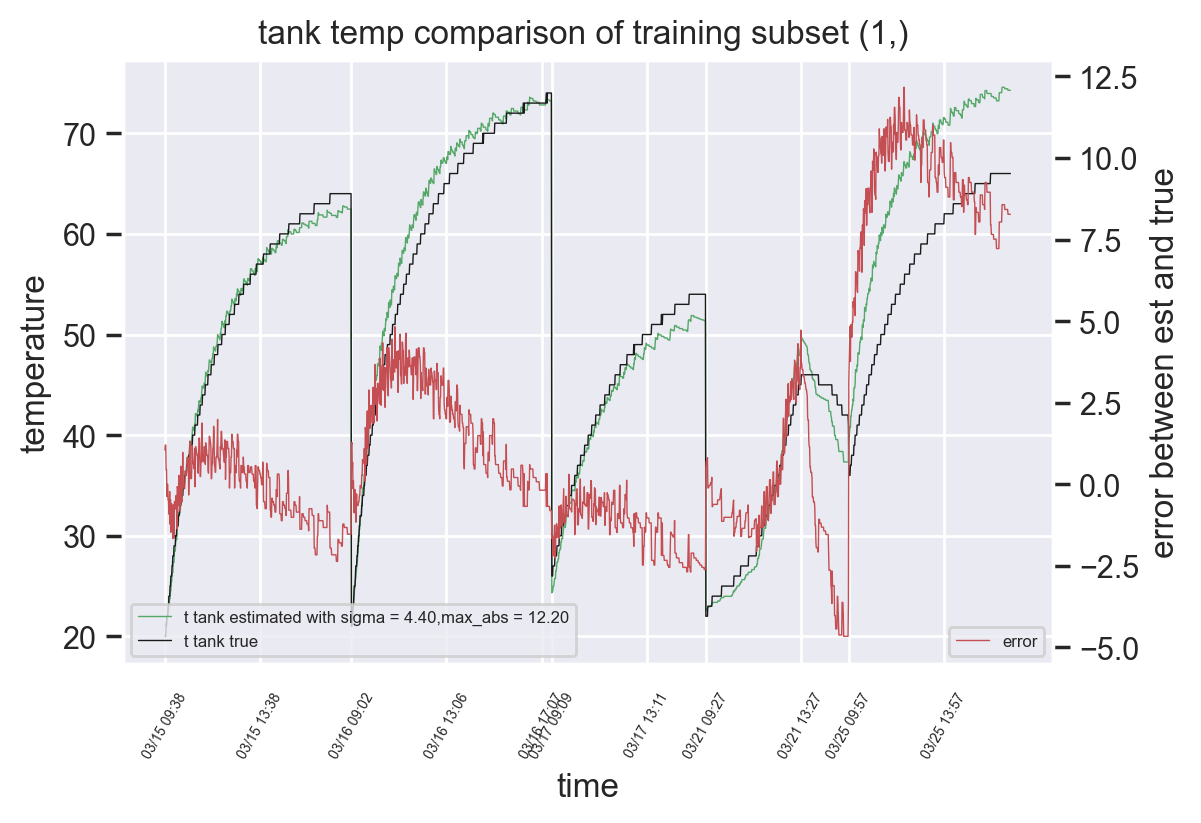

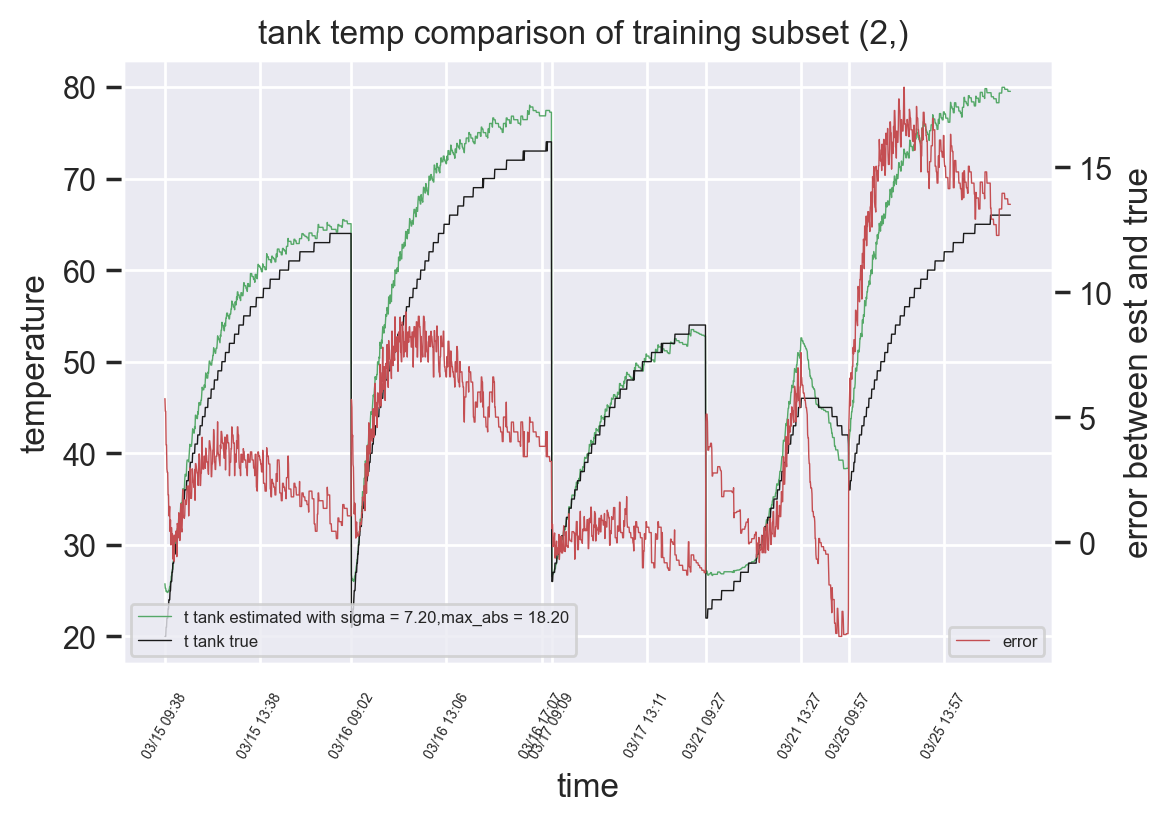

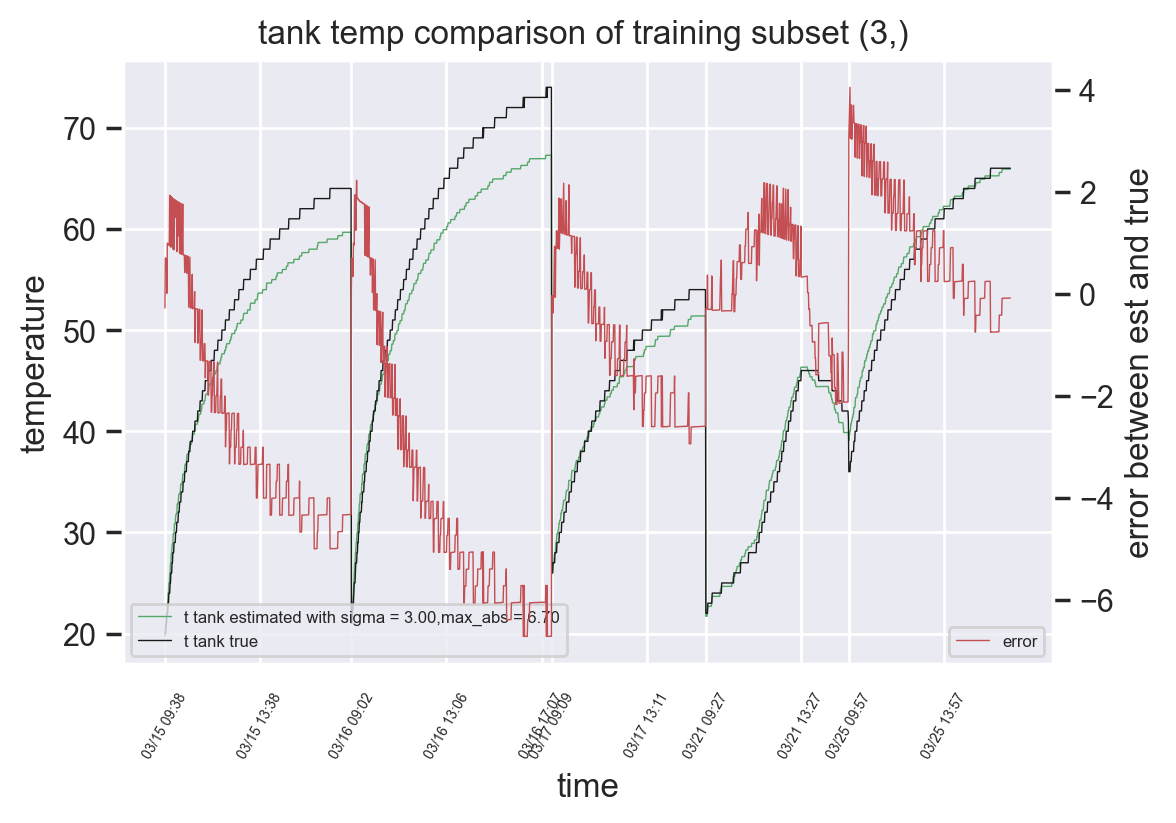

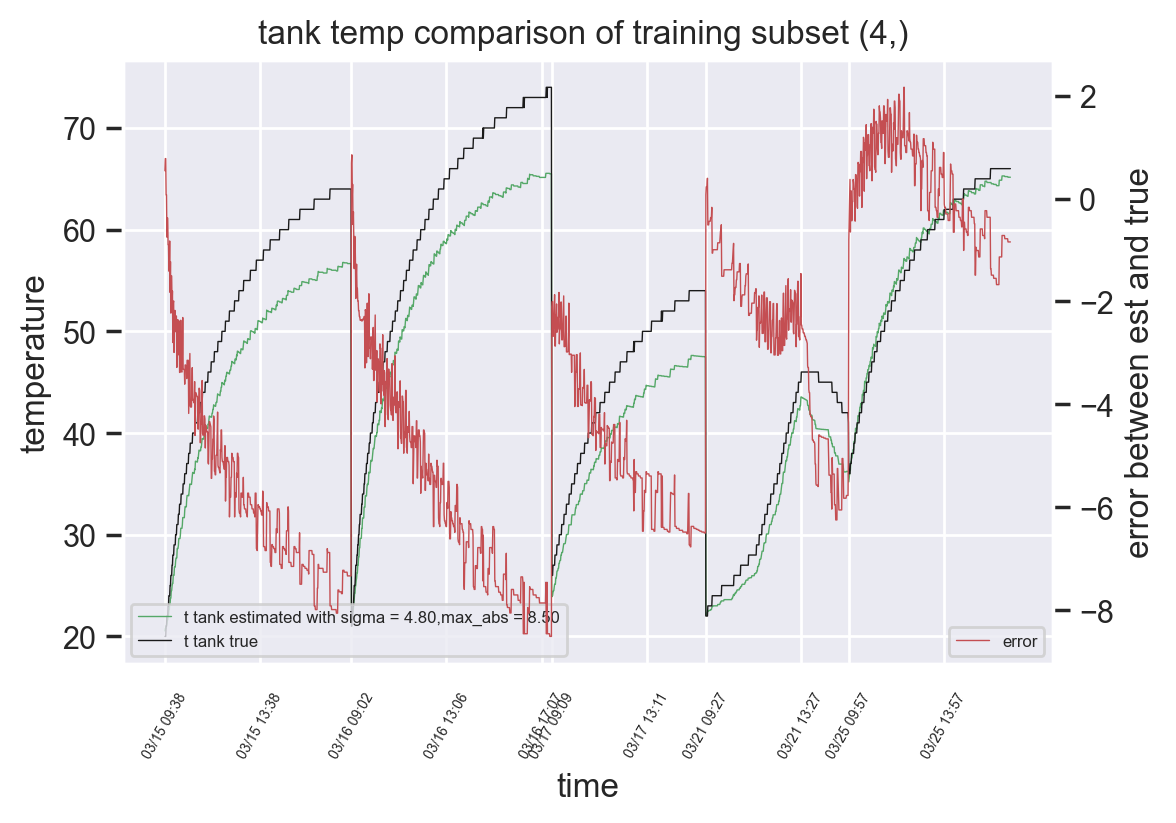

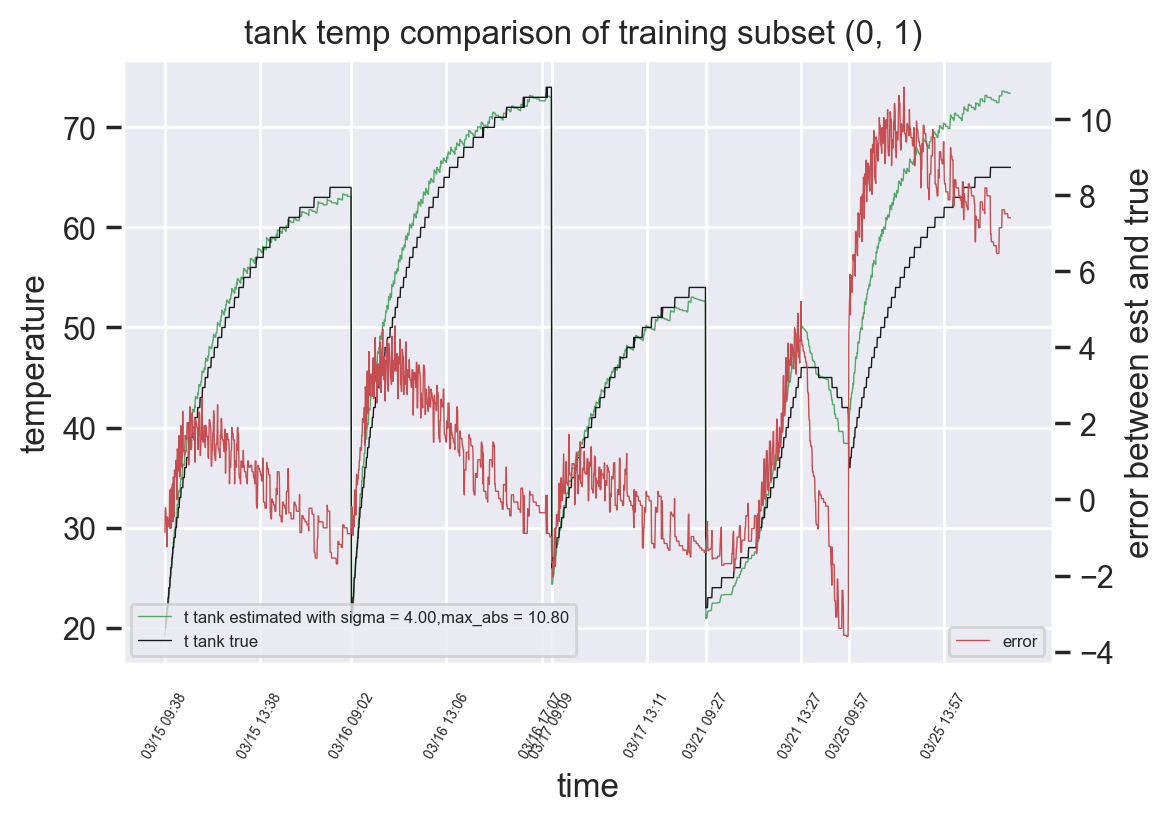

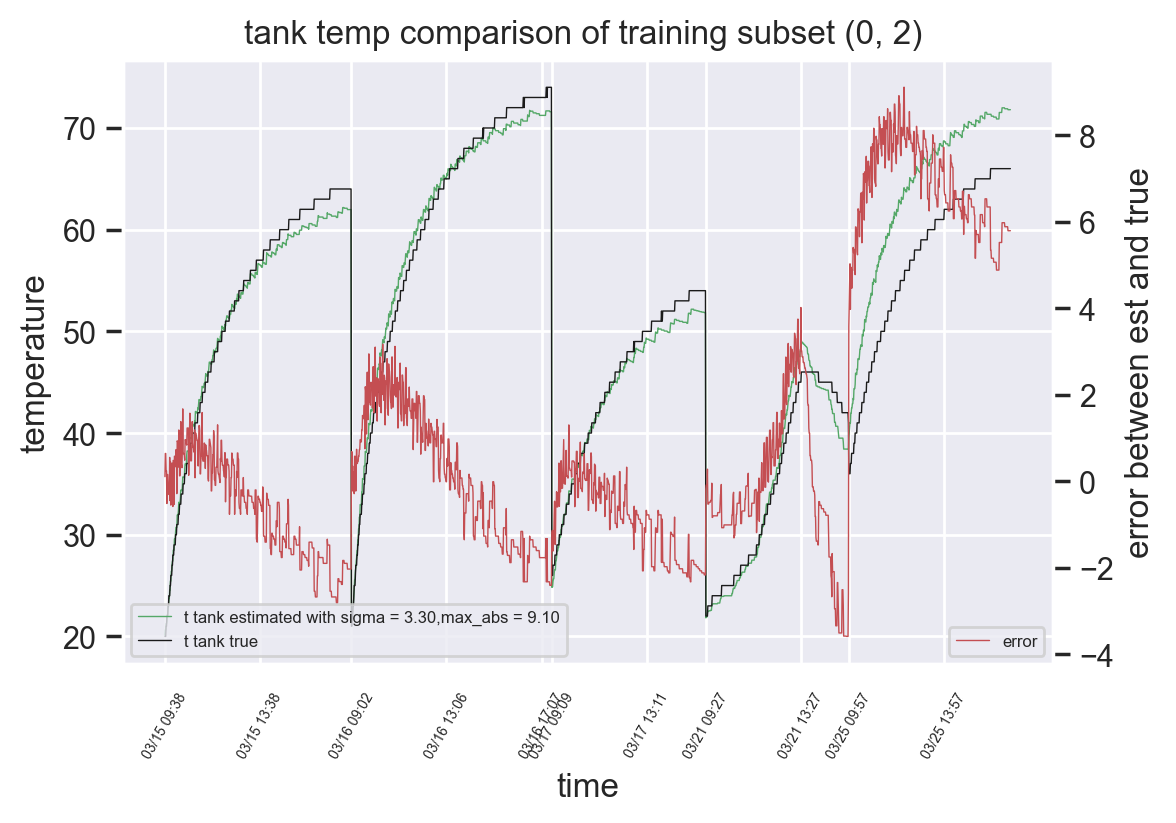

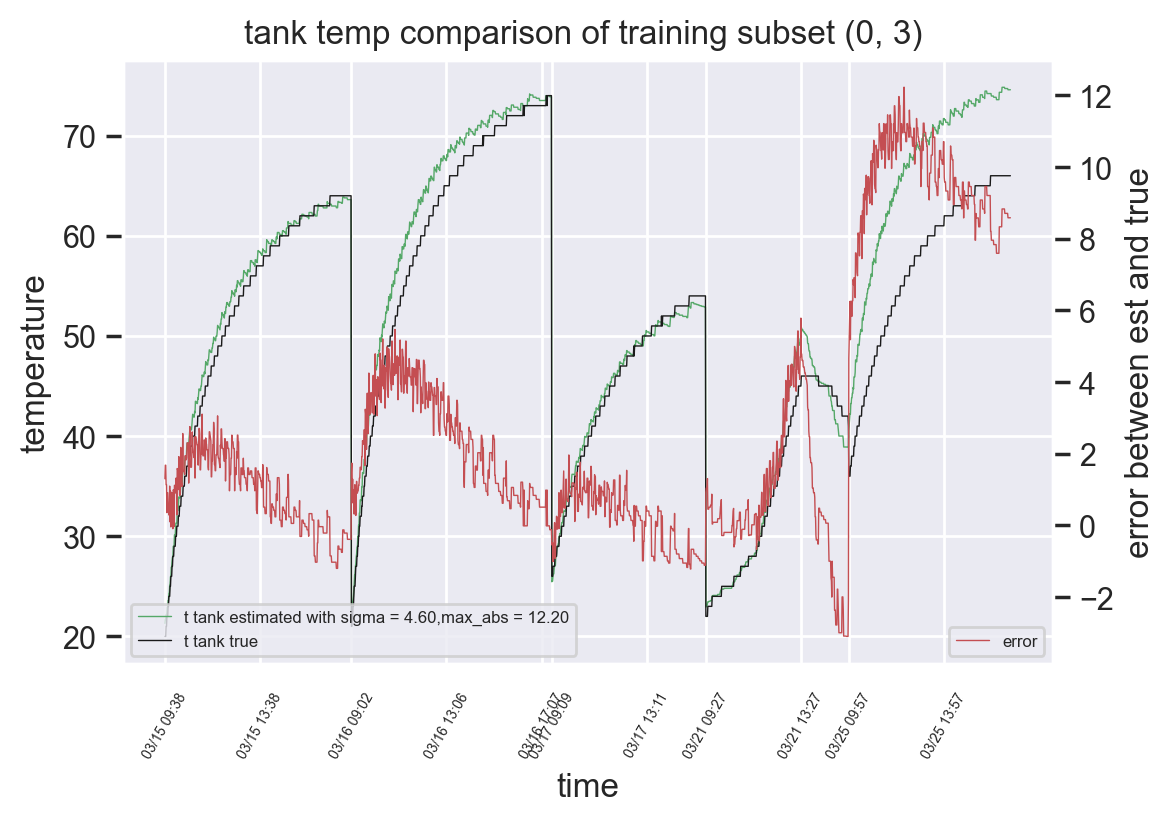

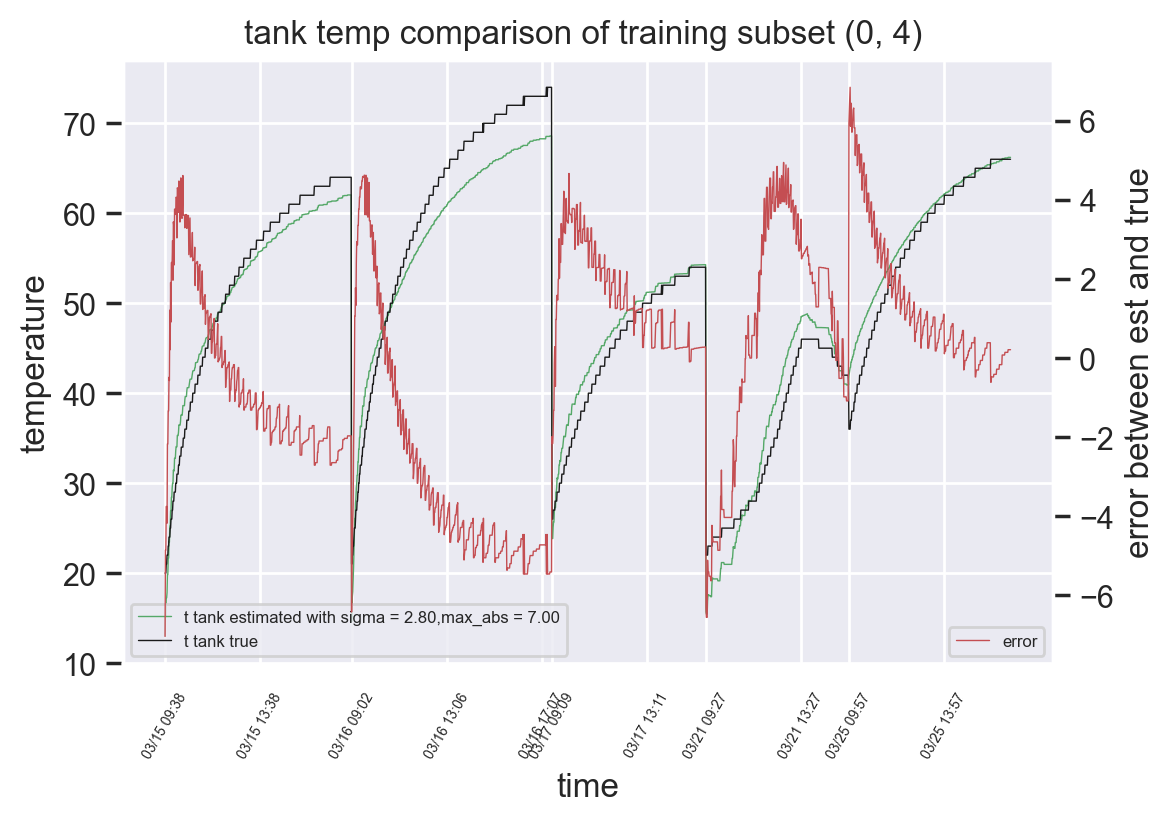

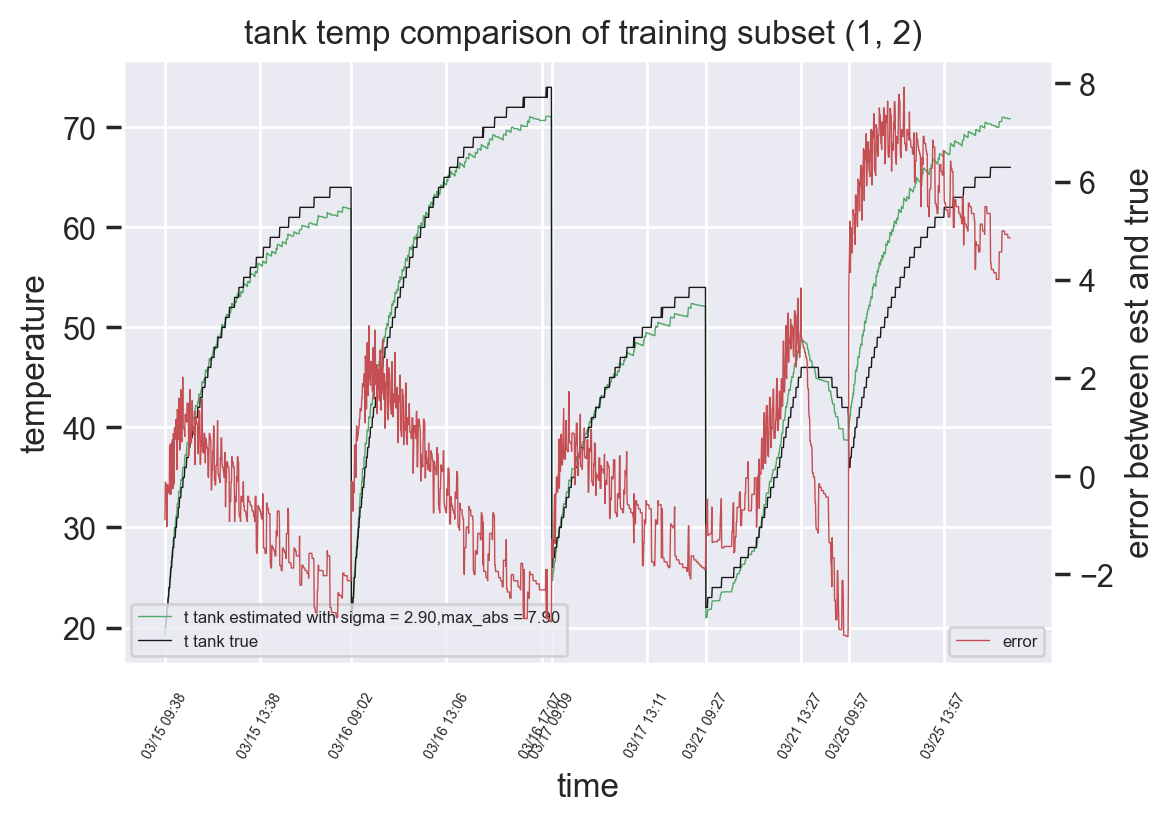

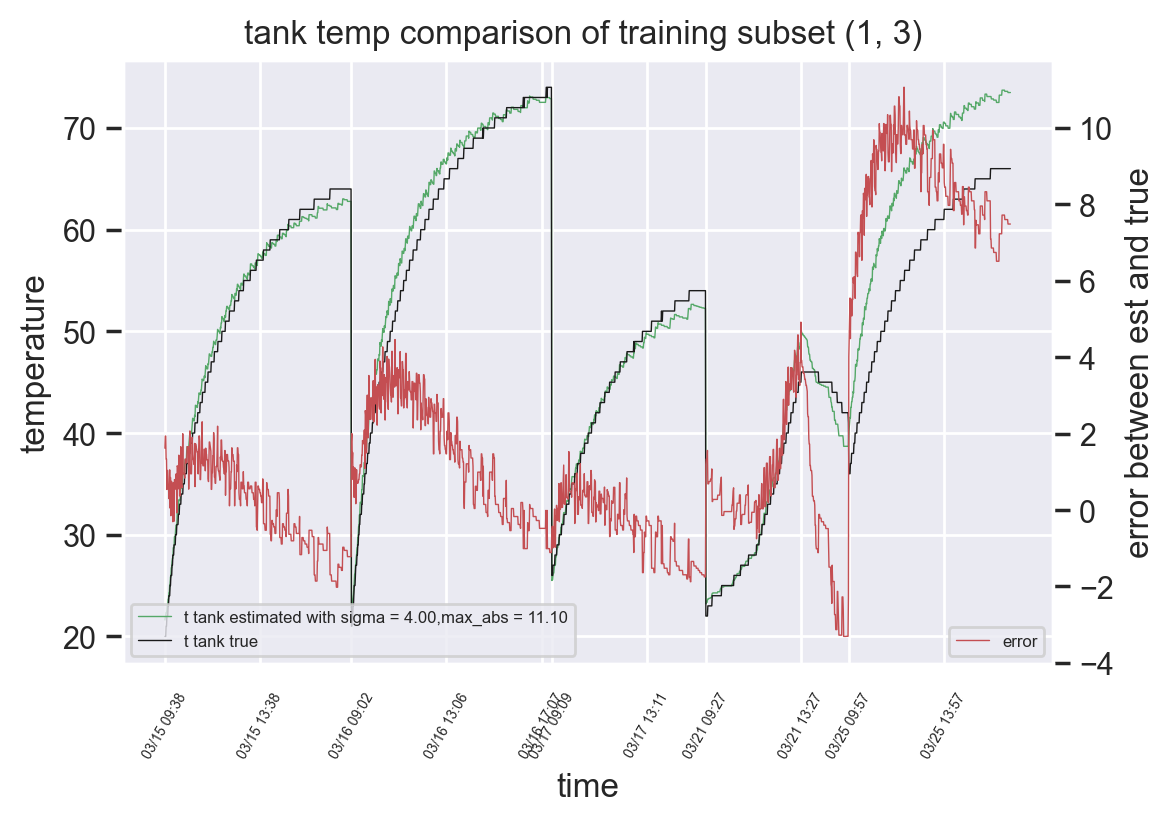

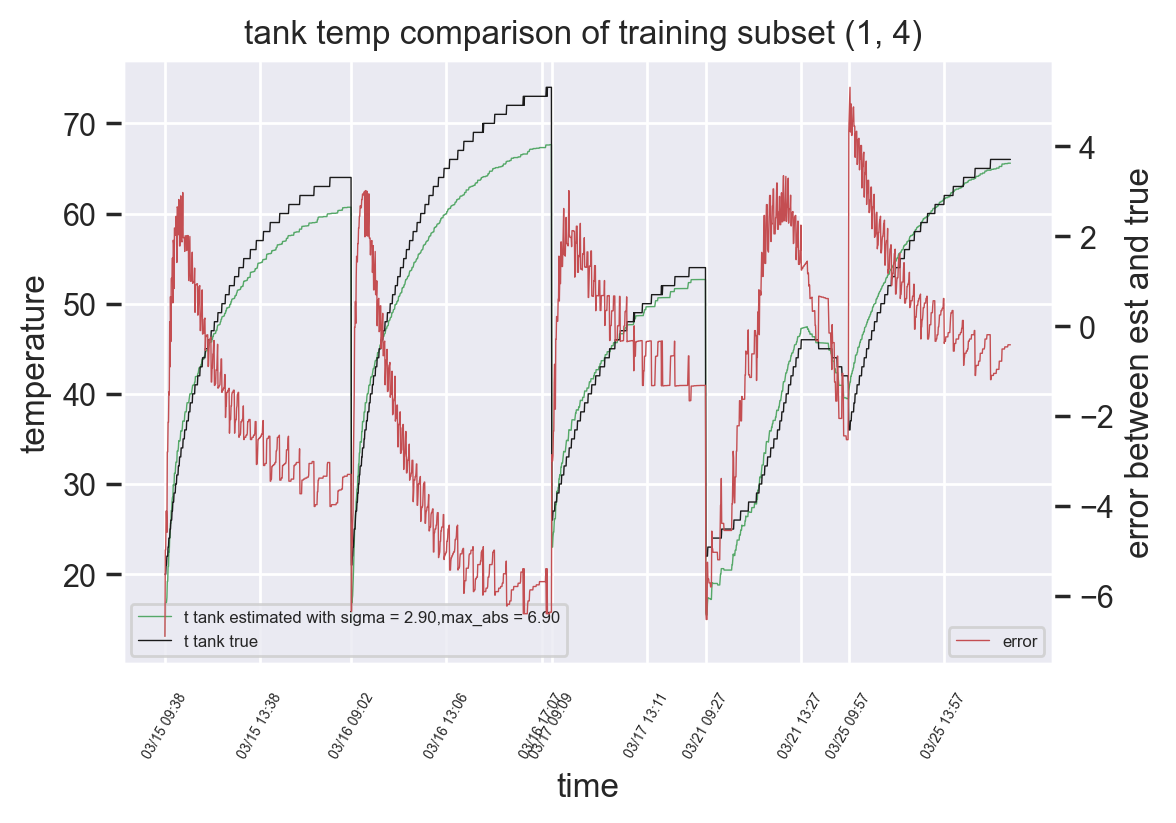

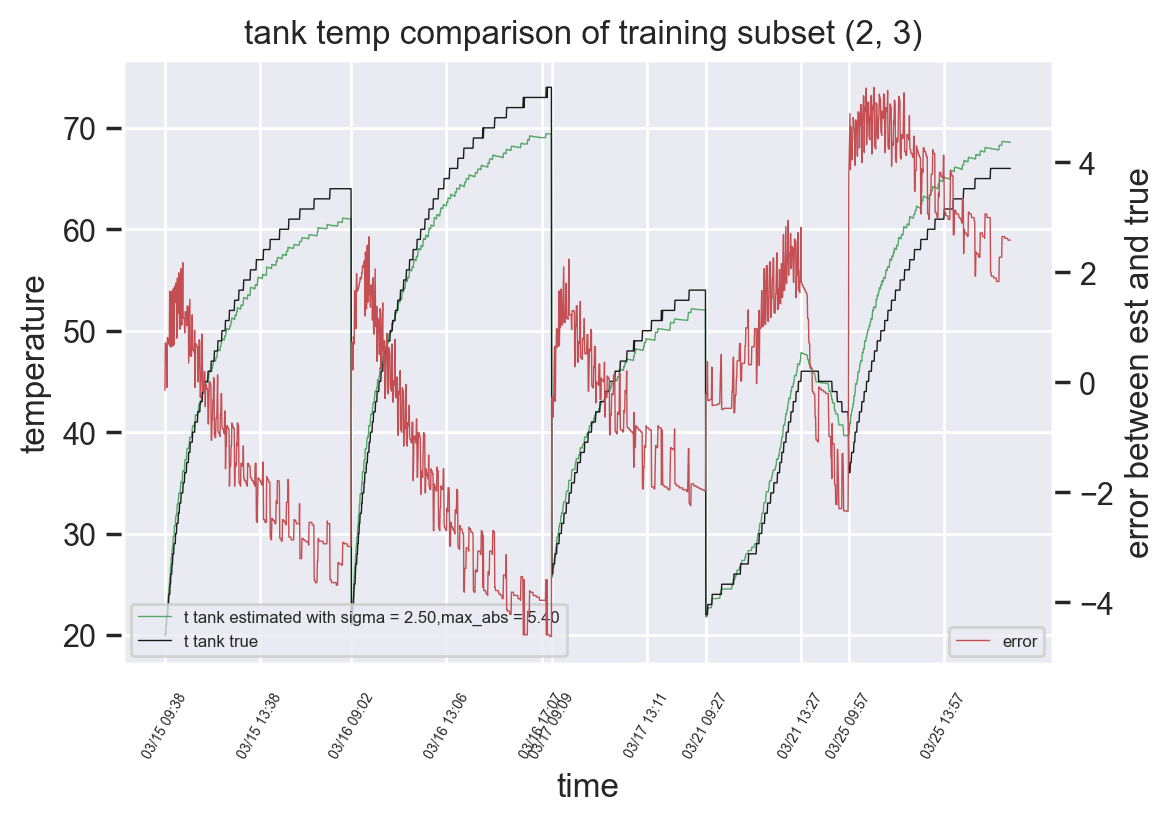

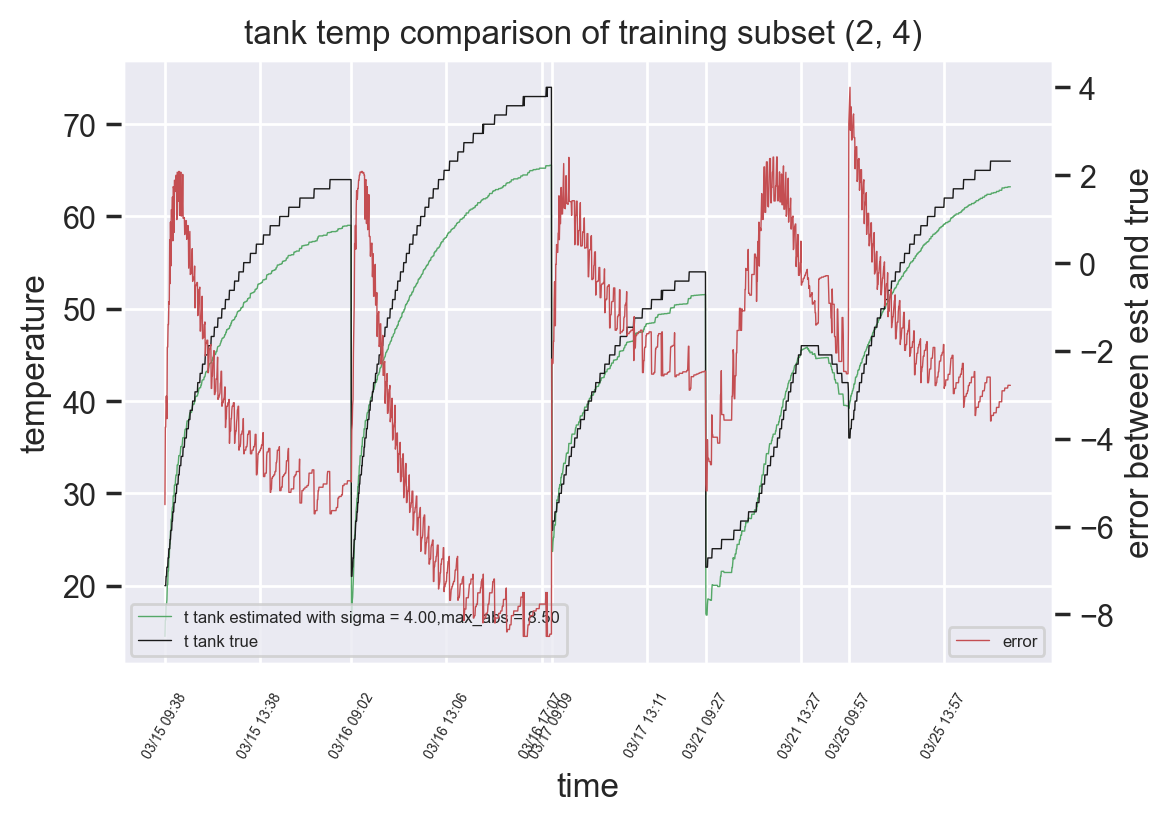

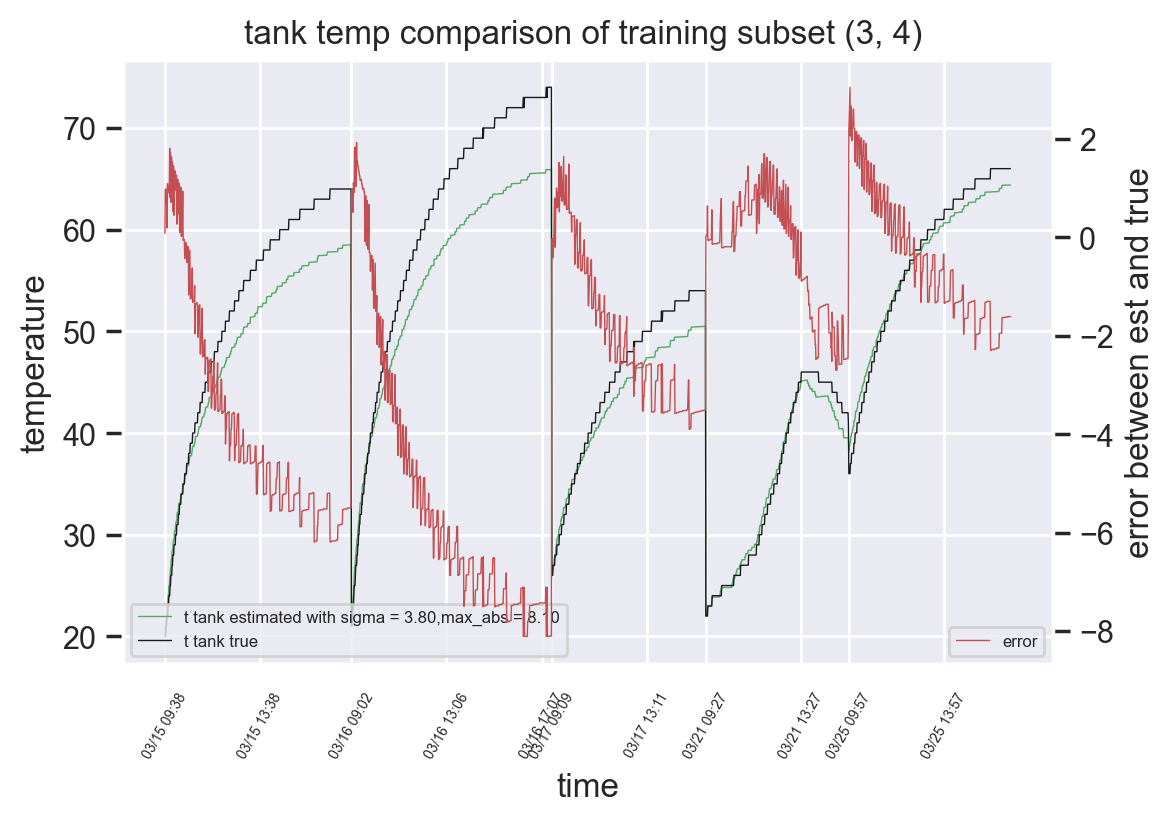

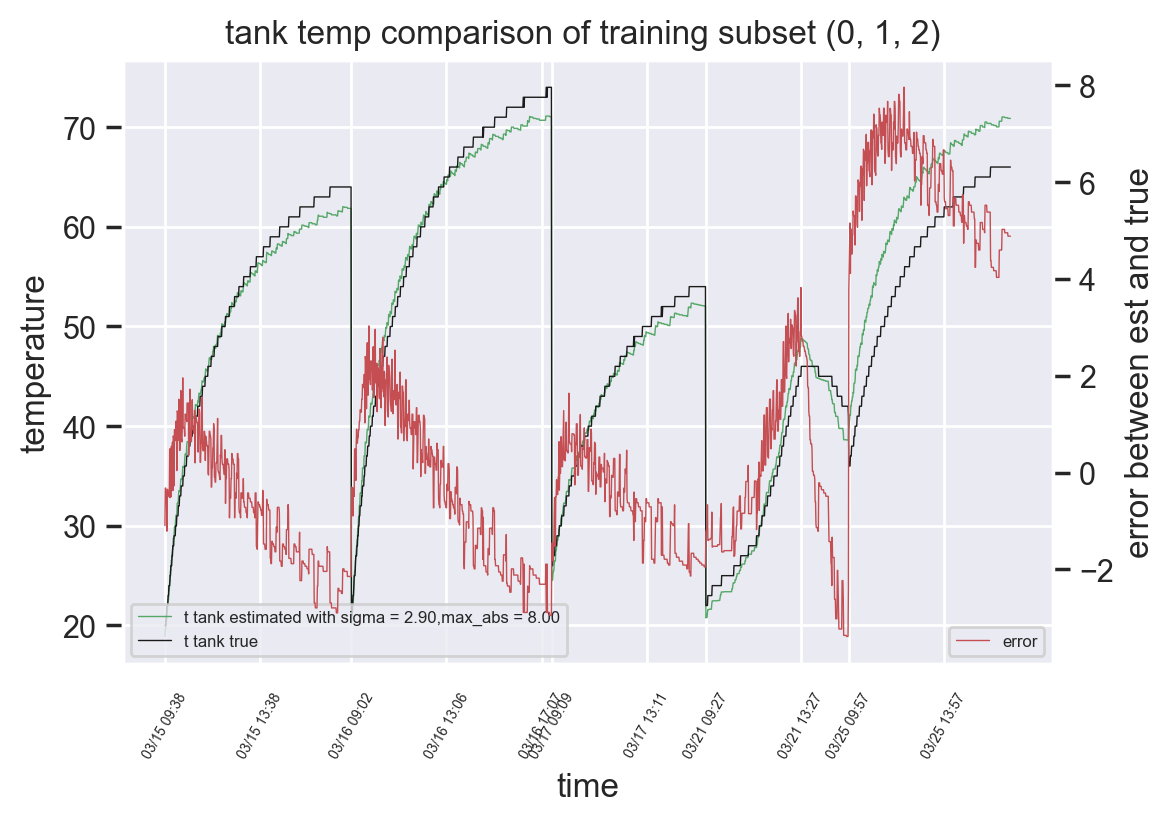

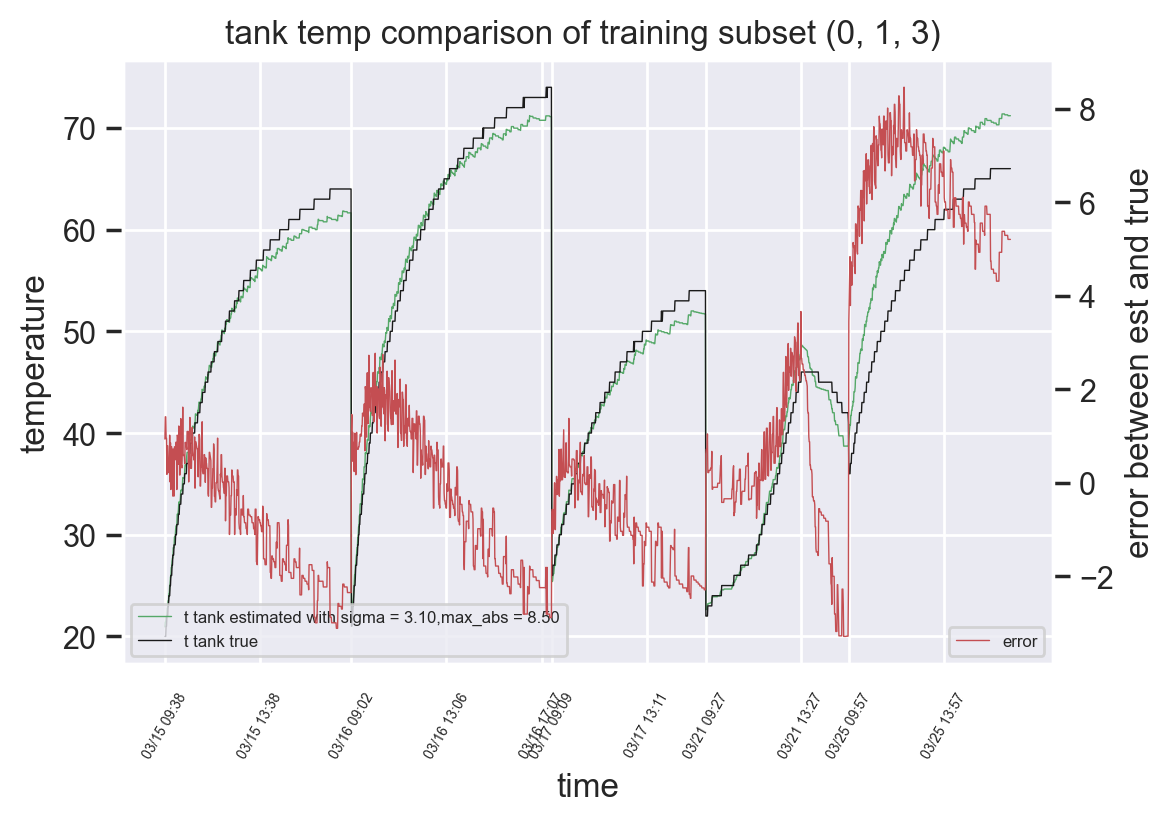

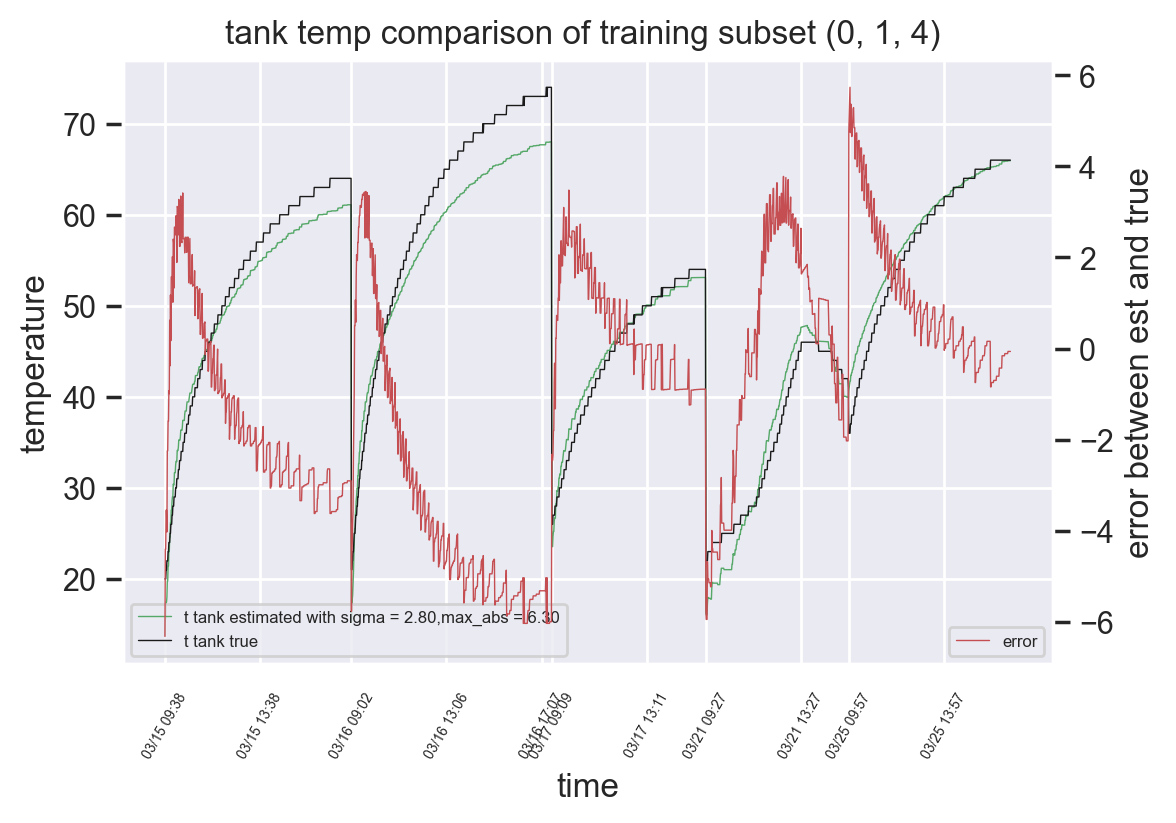

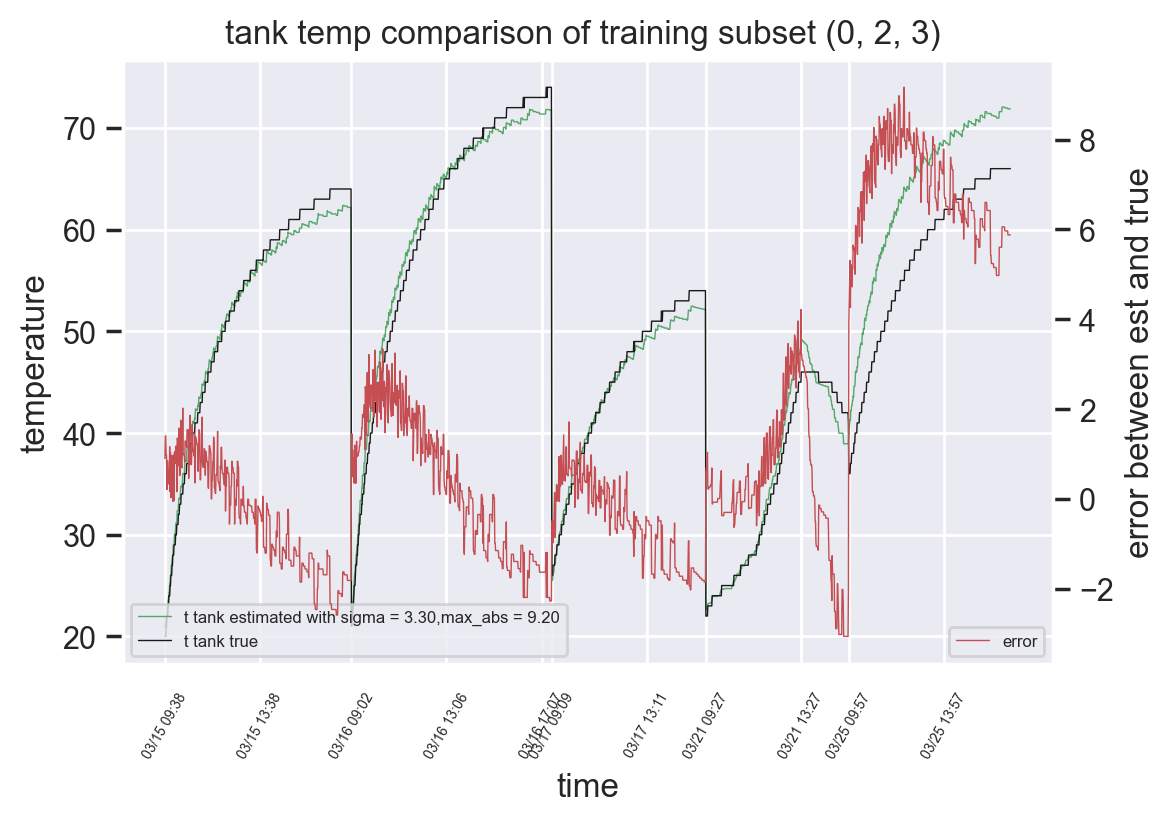

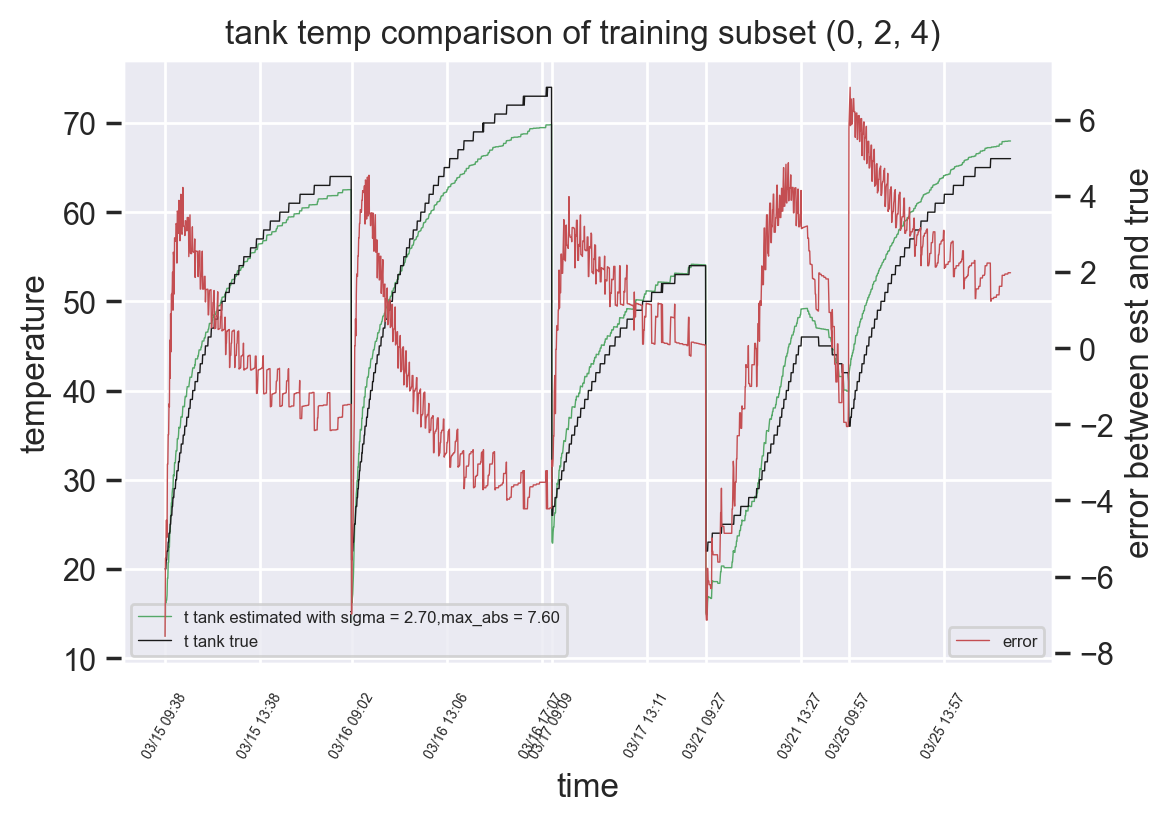

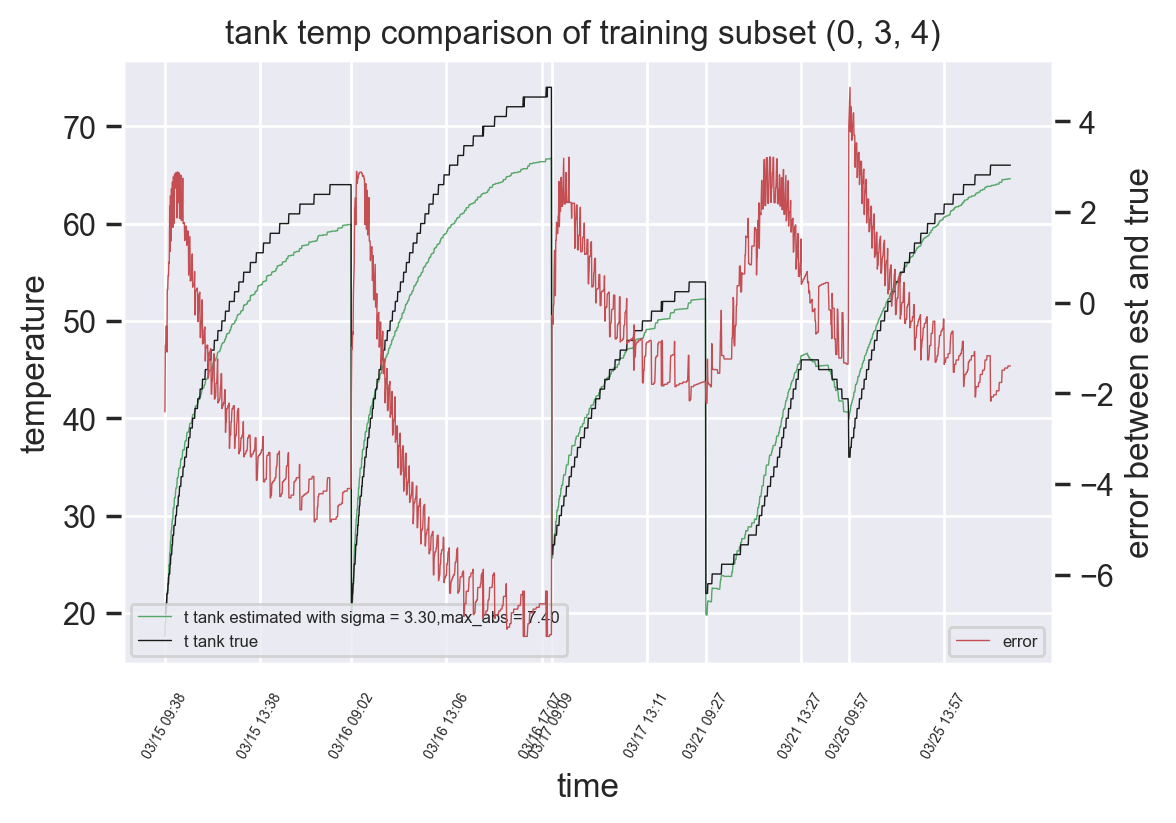

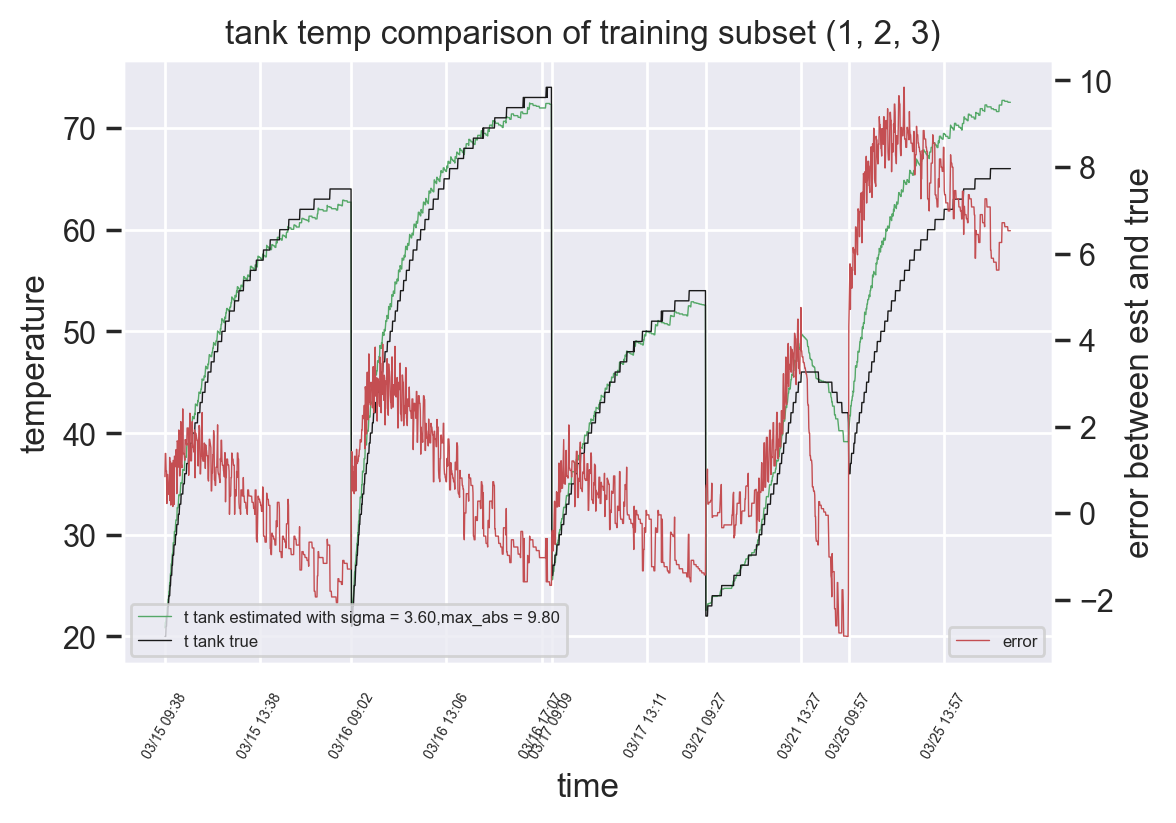

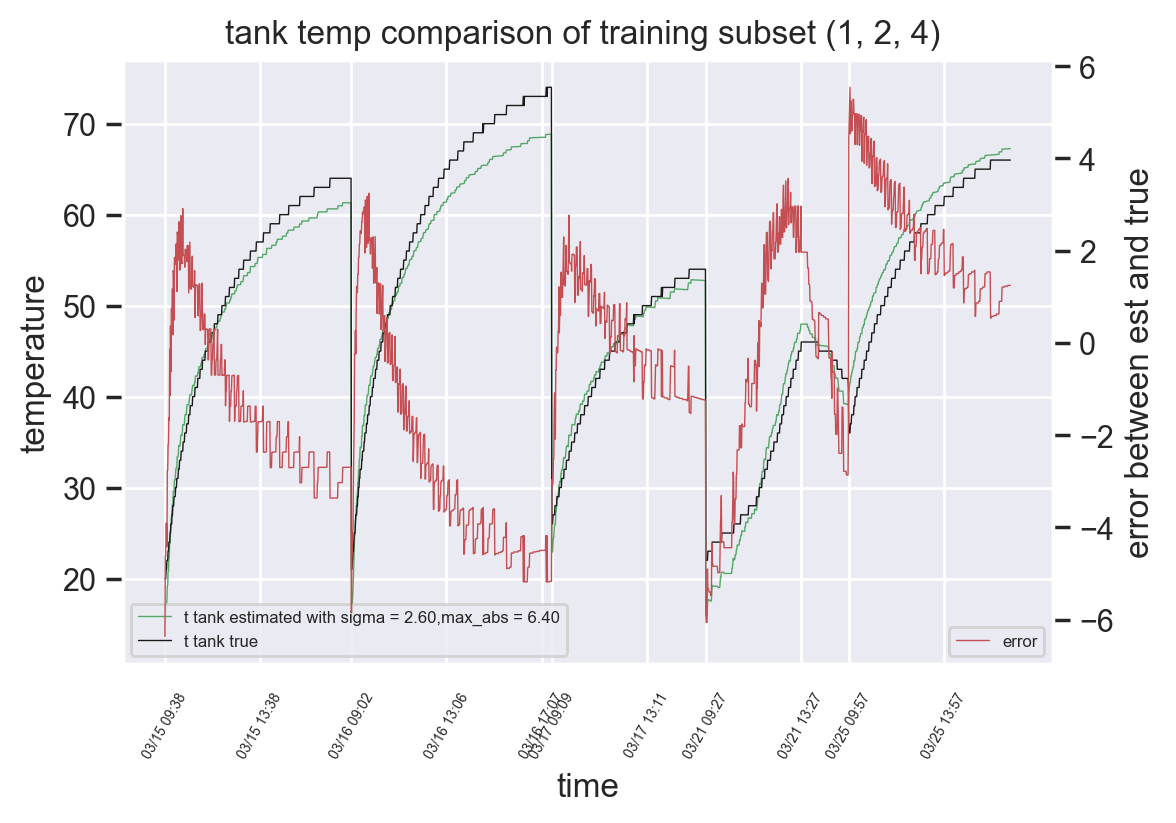

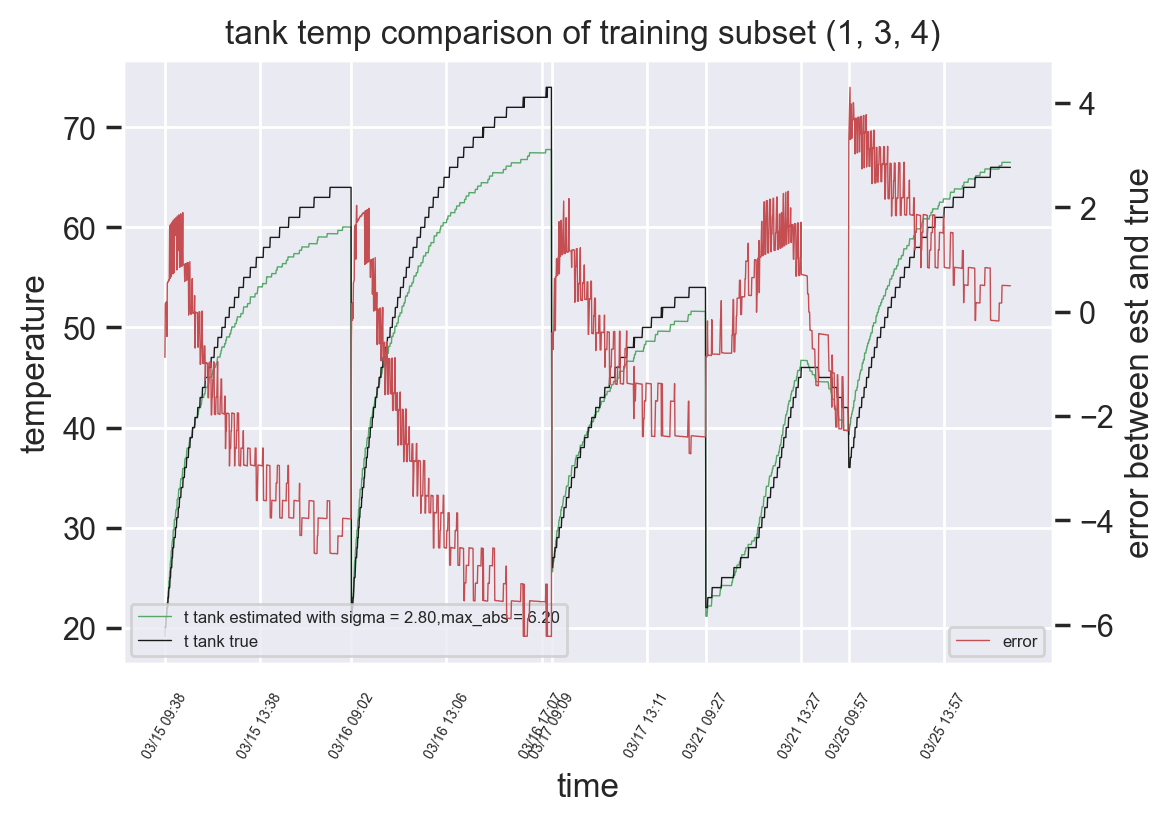

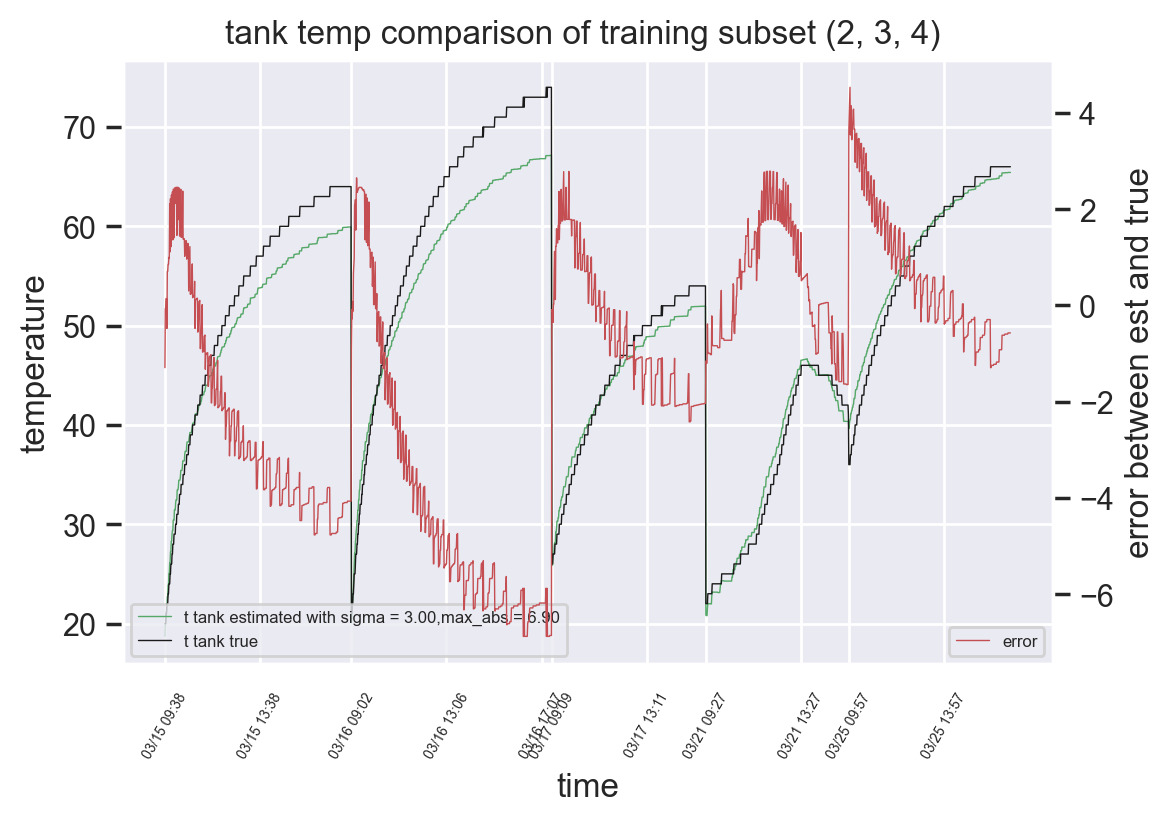

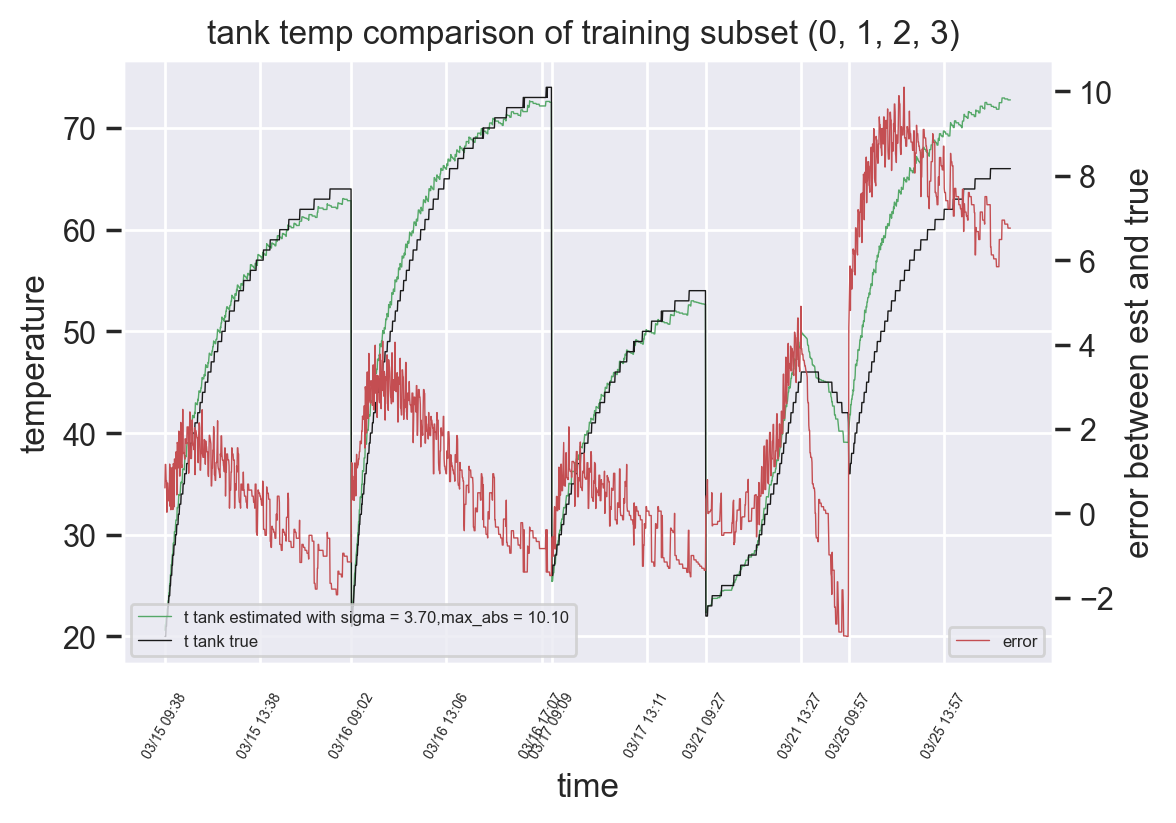

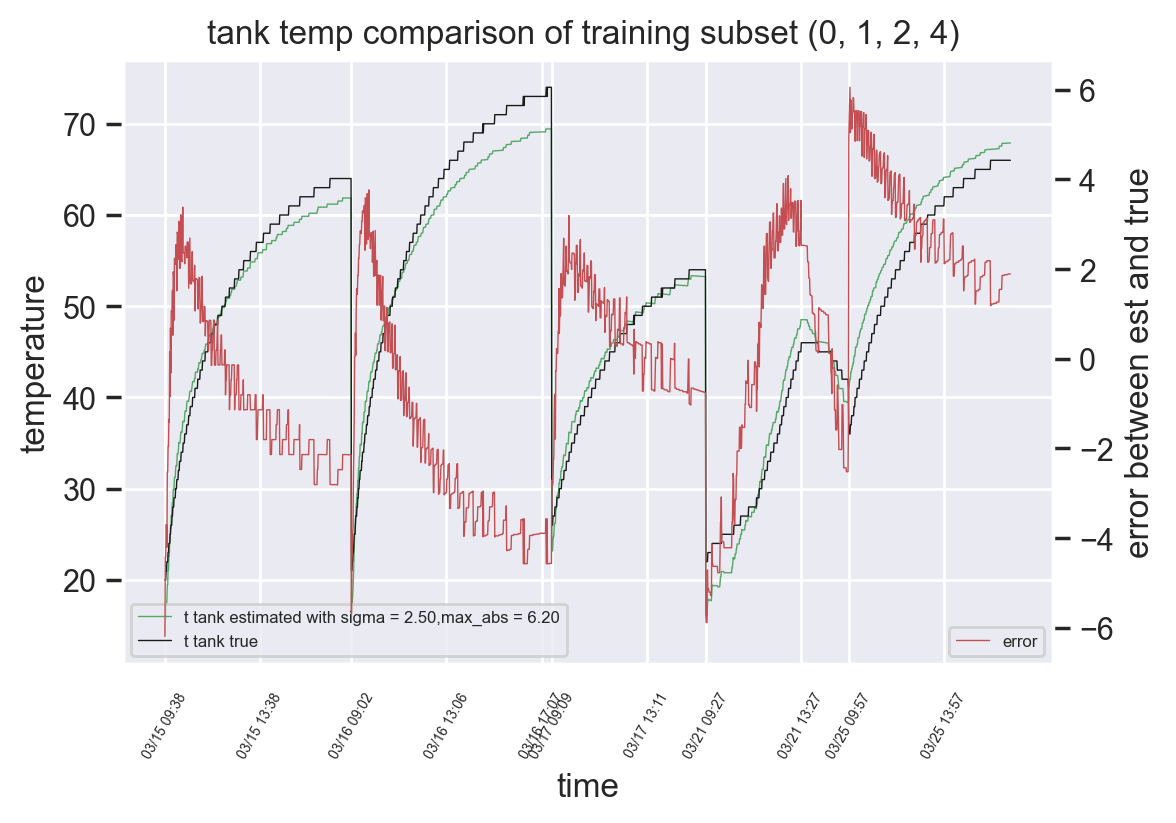

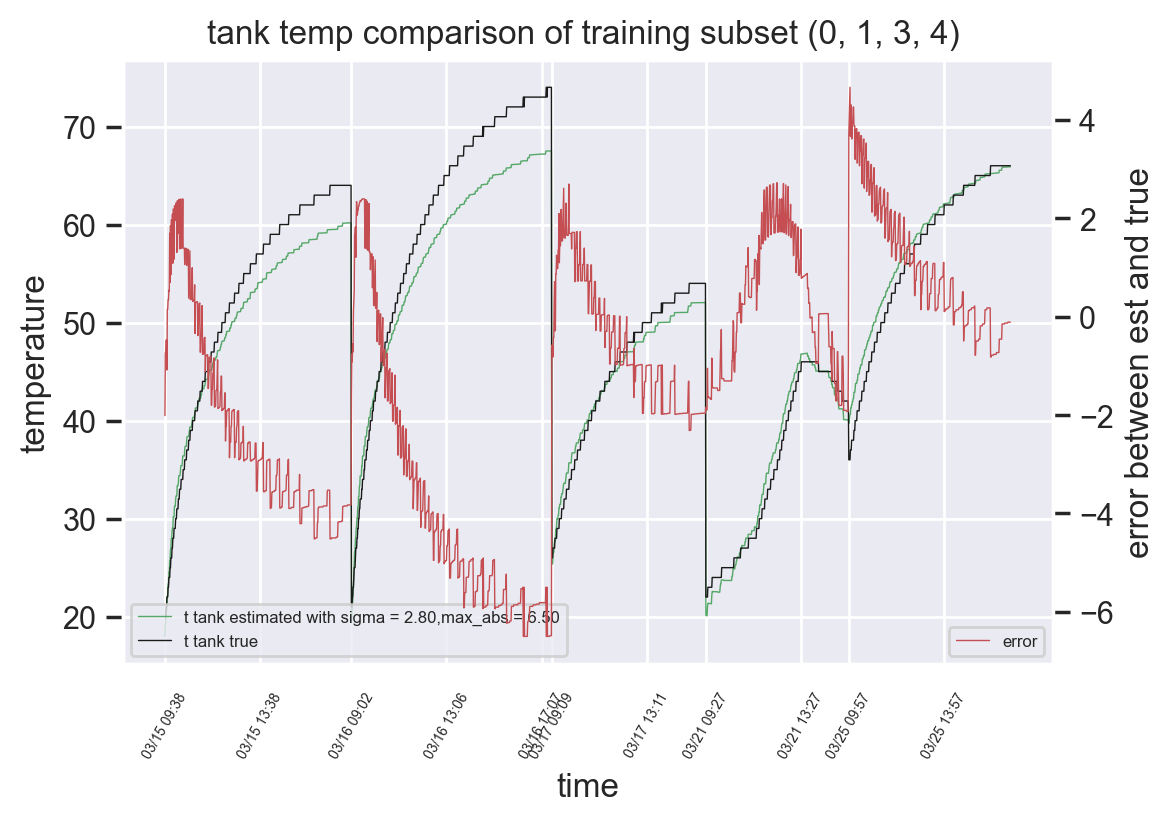

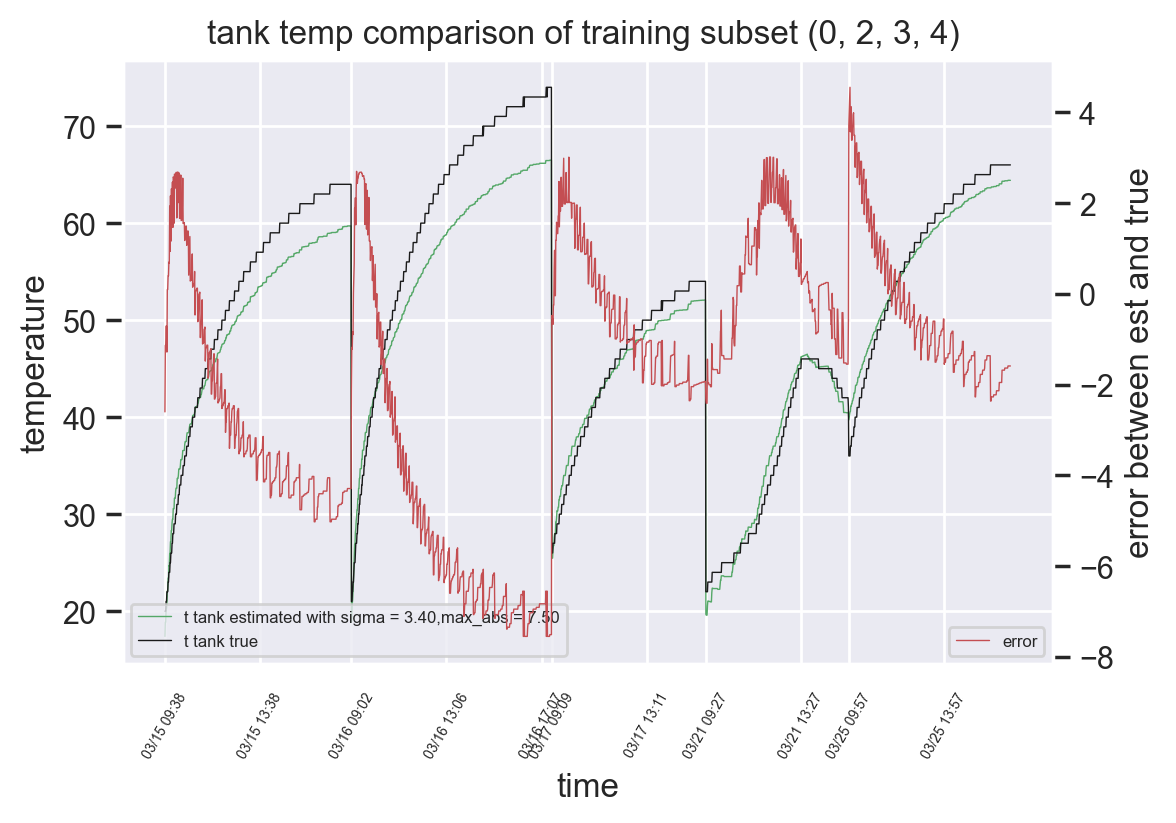

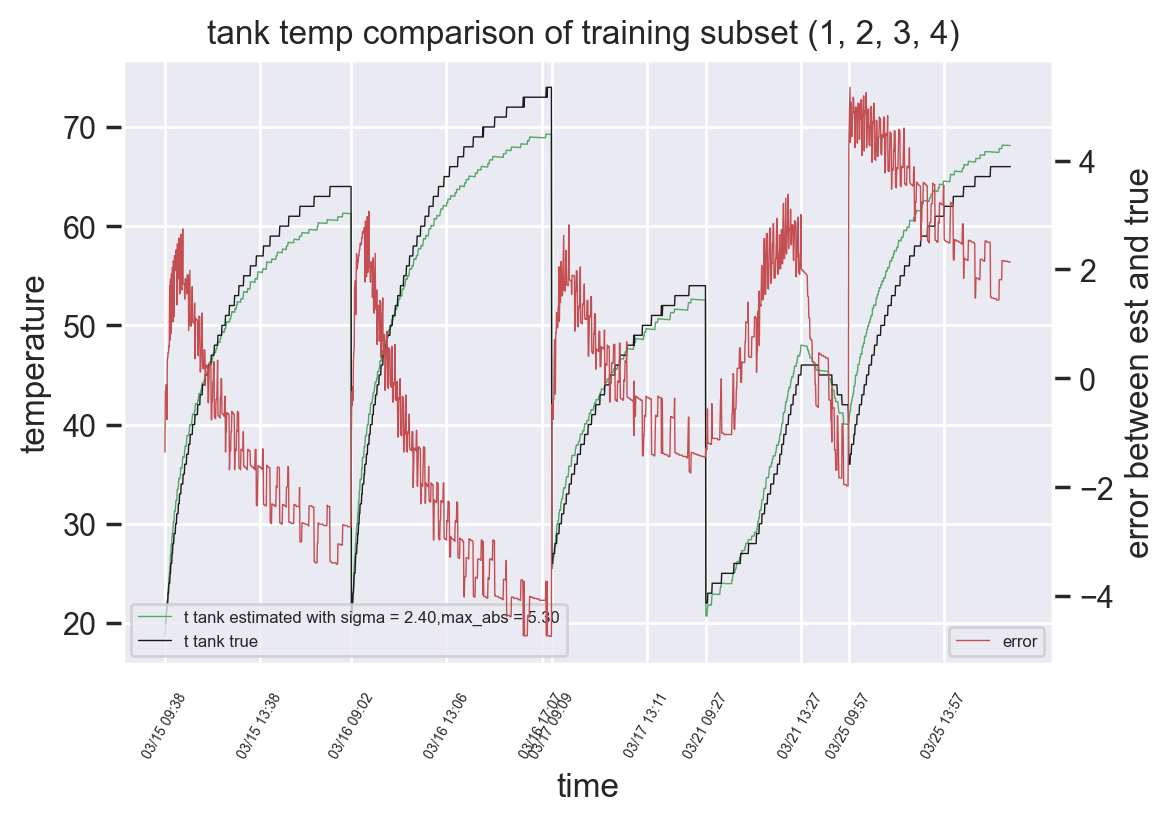

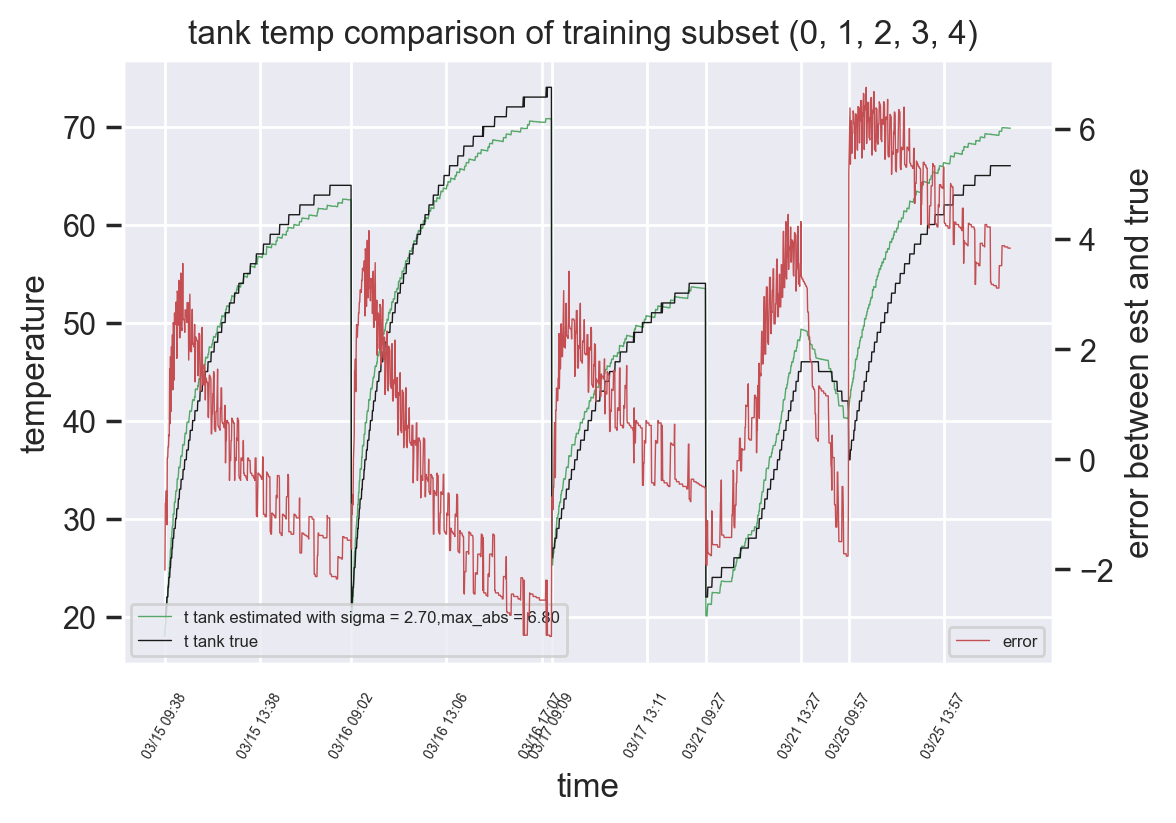

In [5]:
train_num_list_combo = []
for num in range(len(test_date_list)):
	for i in combinations(list(range(len(test_date_list))),num + 1):
		train_num_list_combo.append(i)
for train_num_list in train_num_list_combo:
	
	train_date_list = [test_date_list[i] for i in train_num_list]
	print(train_num_list)
	# print(train_date_list)
	idx_list = [list(range(sum(data_len_list[0:i]),sum(data_len_list[0:i + 1]))) 
				for i in train_num_list]
	train_idx_list = sum([list(range(sum(data_len_list[0:i]),
						sum(data_len_list[0:i + 1]))) 
						for i in train_num_list],
						[]
						)


	# train array 	

	x1_train = np.array([t1[i] - t[i] for i in train_idx_list])				
	x2_train = x1_train ** 2 
	y_train = np.array([t_tank_true[i] - t[i] for i in train_idx_list])					

	# validation array
	x1_valid = (t1 - t).astype(float)
	x2_valid = x1_valid ** 2
	y_valid = (t_tank_true - t).astype(float)
	X_valid =  np.column_stack((x2_valid,x1_valid))

	# Calculate polynomial fitting parameters
	poly_coef = np.around(GP.GasPresExperiment_IN.cal_polyfit_coef(2,y_train,x1_train),decimals=2)
	print('poly_coef = ',poly_coef)
	t_tank_est = np.dot(X_valid,poly_coef[:-1]) + poly_coef[-1] + t
	sigma,max_abs = GP.GasPresExperiment_IN.plot_t_tank_compare(t_tank_true, 
																t_tank_est, 
																title='tank temp comparison of training subset {} '.format(train_num_list),
																x_tick_idx=x_tick_idx,
																x_tick_str=x_tick_str
																)
	print('sigma and max_abs are',sigma,max_abs)


### Plot final P20 comparison

[1.2906379445272456 1.2868521178451076 1.2868521178451076 ...
 1.2695757630932099 1.2695757630932099 1.2695757630932099]


(0.01, 0.021)

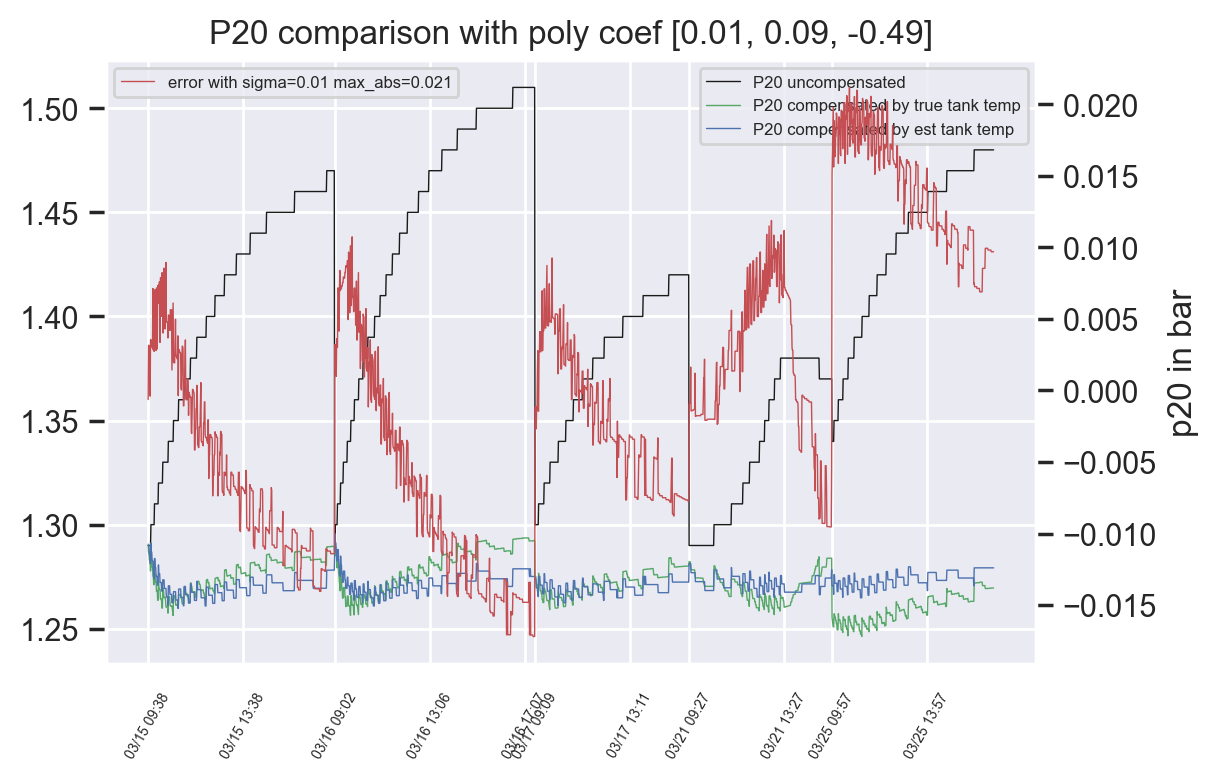

In [6]:
	poly_coef = [0.01,0.09,-0.49]
	# poly_coef = [0.05,1.23,-3.55]
	x1 = t1 - t
	x2 = x1 ** 2
	y = t_tank_true - t
	x_stack =  np.column_stack((x2,x1))
	t_tank_est = np.dot(x_stack,poly_coef[:-1]) + poly_coef[-1] + t
	
	p20_est = 293.15 * p_mano / (273.15 + t_tank_est)
	p20_true = 293.15 * p_mano / (273.15 + t_tank_true)
	print(p20_est)
	GP.GasPresExperiment_IN.plot_p20_compare(p_mano, 
											 p20_est, 
											 p20_true, 
											 title='P20 comparison with poly coef {}'.format(poly_coef),
											 x_tick_idx=x_tick_idx,
											 x_tick_str=x_tick_str
											 )

## TR result

### Data loading

In [7]:
test_date_list = ['2022_03_15','2022_03_16','2022_03_17','2022_03_21','2022_03_25'] # all test dates
case_list,data_len_list = [],[]
# splice data in all test days
for j,test_date in enumerate(test_date_list):

		file_path = curDirectory + \
					'\\07_Test from other lab\India Lab\\SafeRing_XT_' + test_date + '.csv'
		case = TR.TempRiseExperiment_IN(file_path)
		case_list.append(case)


### 2022.03.15
630 till stable

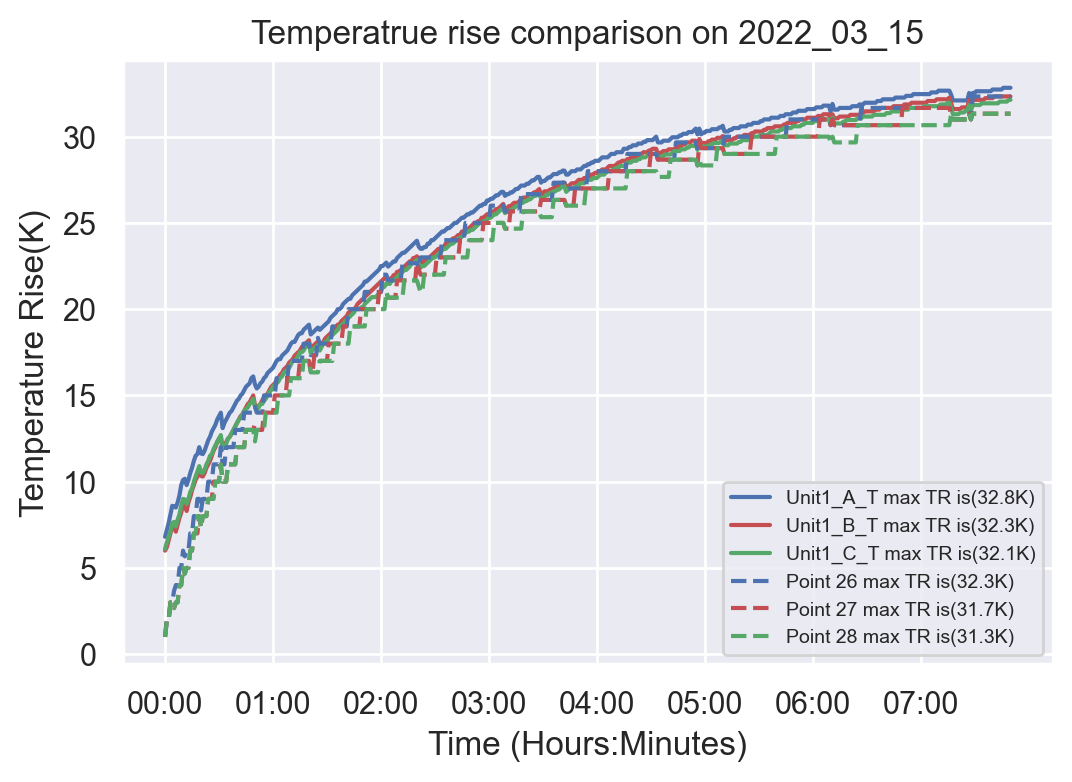

In [8]:
case_list[0].tr_plot(['Unit1_A_T', 
					  'Unit1_B_T', 
					  'Unit1_C_T', 
					  'Point 26',
					  'Point 27', 
					  'Point 28'], 
					 title='Temperatrue rise comparison on 2022_03_15', 
					 line_style=['-','-','-','--','--','--'],
					 line_color=['b','r','g','b','r','g'] 
					)
		

### 2022.03.16
700A till stable

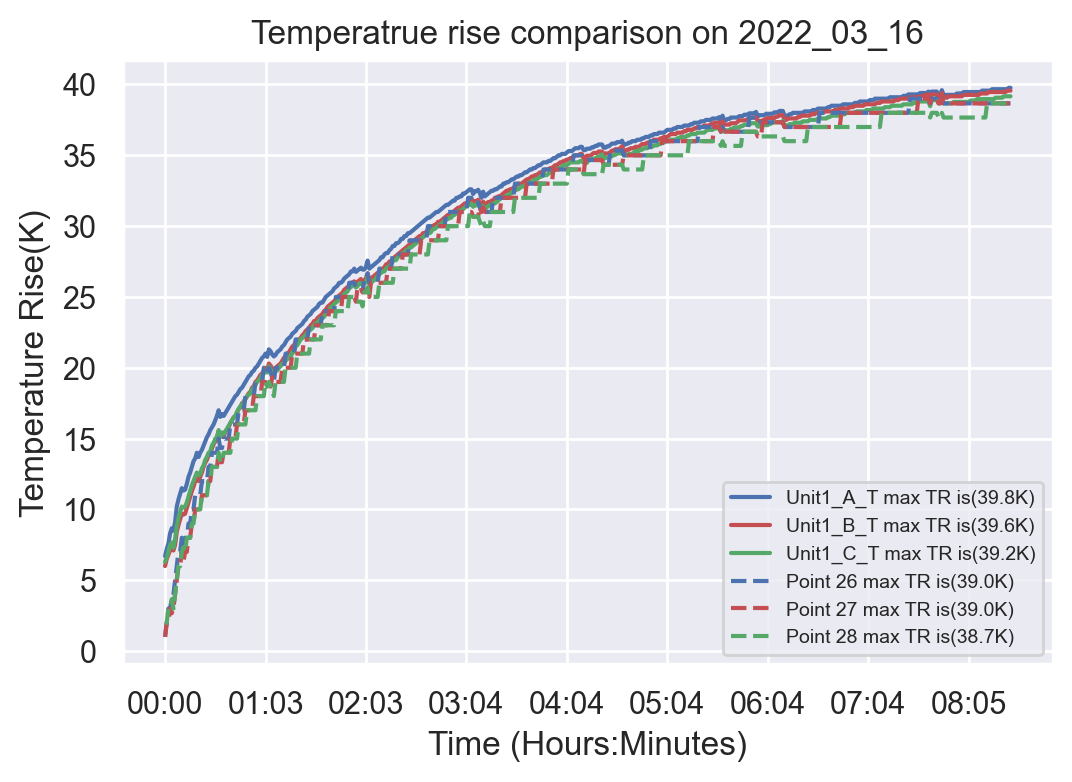

In [9]:
case_list[1].tr_plot(['Unit1_A_T', 
					  'Unit1_B_T', 
					  'Unit1_C_T', 
					  'Point 26', 
					  'Point 27', 
					  'Point 28'], 
					 title='Temperatrue rise comparison on 2022_03_16', 
					 line_style=['-','-','-','--','--','--'],
					 line_color=['b','r','g','b','r','g'] 
					)
		

### 2022.03.17
500-630-500A till stable

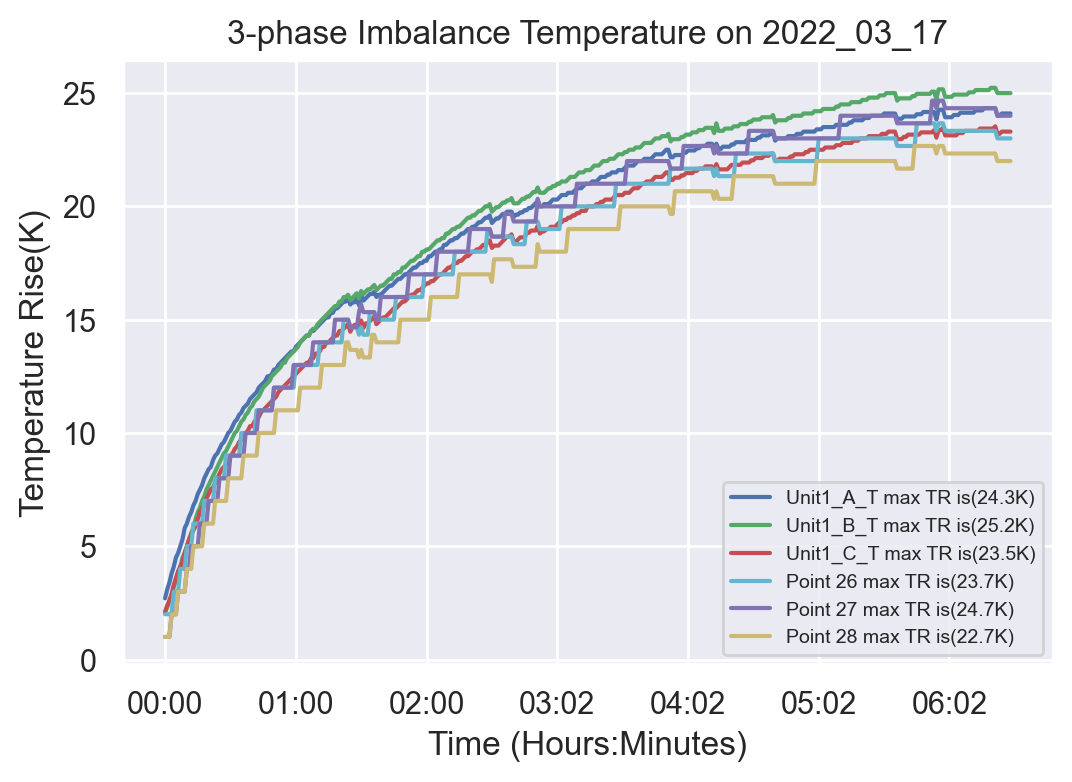

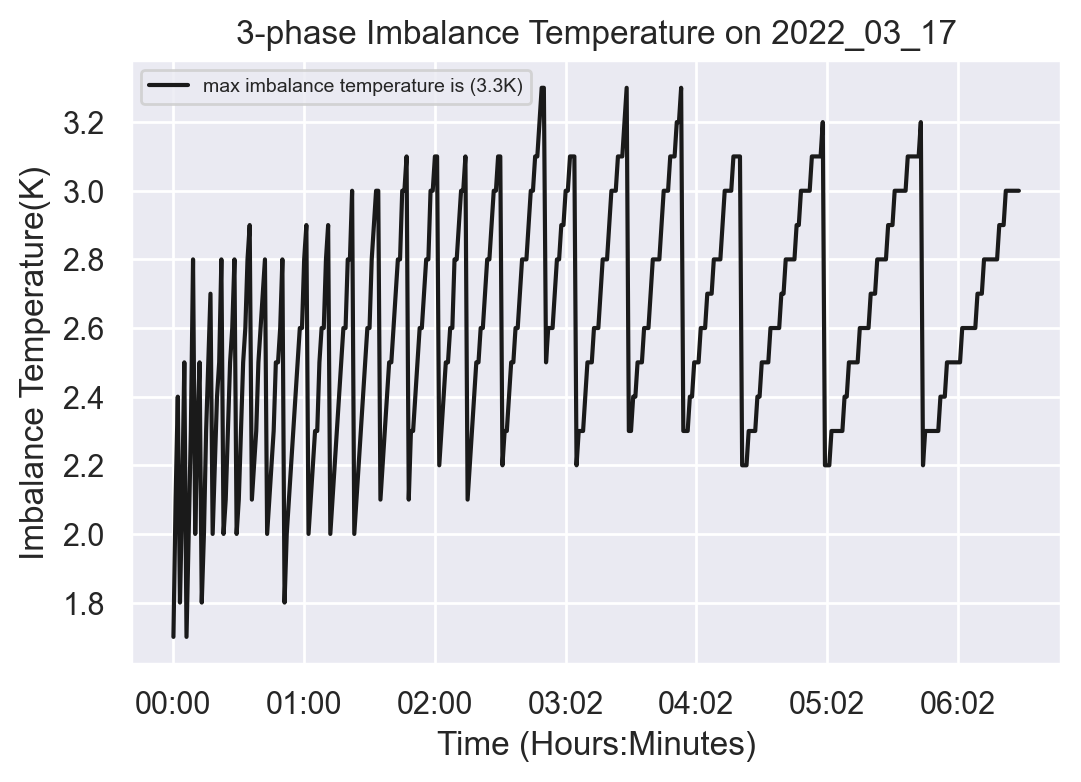

In [10]:
case_list[2].tr_plot(['Unit1_A_T', 
							 'Unit1_B_T', 
							 'Unit1_C_T', 
							 'Point 26', 
							 'Point 27', 
							 'Point 28'], 
					 title='3-phase Imbalance Temperature on 2022_03_17', 

					)
case_list[2].imbalance_plot(['Unit1_A_T', 
							 'Unit1_B_T', 
							 'Unit1_C_T', 
							 'Point 26', 
							 'Point 27', 
							 'Point 28'], 
					 title='3-phase Imbalance Temperature on 2022_03_17', 

					)

### 2022.03.21
dynamic current 100-300-500-630-400-200A

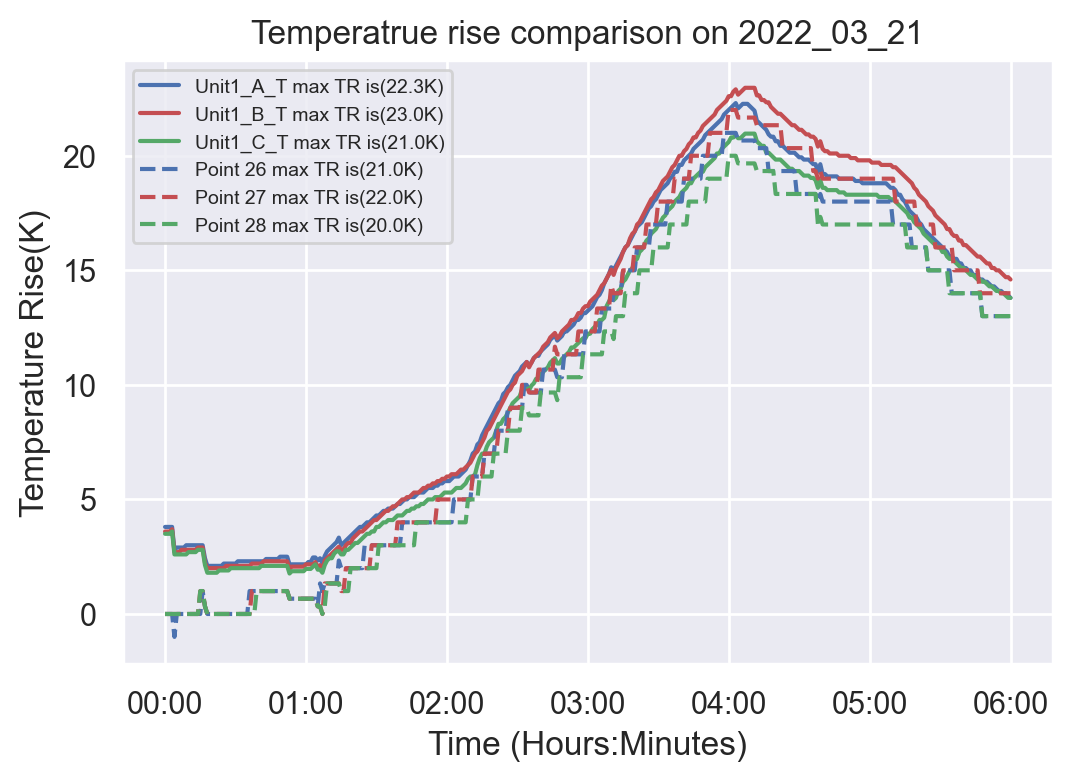

In [11]:
case_list[3].tr_plot(['Unit1_A_T', 
					  'Unit1_B_T', 
					  'Unit1_C_T', 
					  'Point 26', 
					  'Point 27', 
					  'Point 28'], 
					 title='Temperatrue rise comparison on 2022_03_21', 
					 line_style=['-','-','-','--','--','--'],
					 line_color=['b','r','g','b','r','g'] 
					)

### 2022.03.25
630A till stable with fault

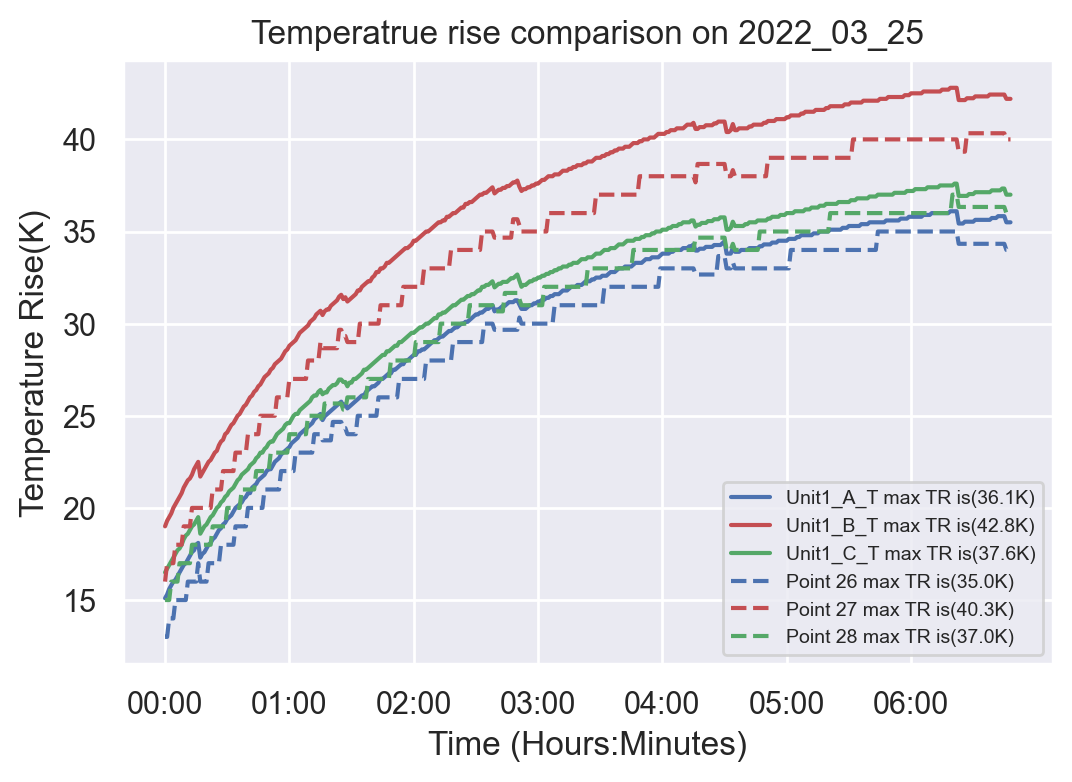

In [12]:
case_list[4].tr_plot(['Unit1_A_T', 
					  'Unit1_B_T', 
					  'Unit1_C_T', 
					  'Point 26', 
					  'Point 27', 
					  'Point 28'], 
					 title='Temperatrue rise comparison on 2022_03_25', 
					 line_style=['-','-','-','--','--','--'],
					 line_color=['b','r','g','b','r','g'] 
					)